<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

new_rows = []

with open ('sat_scores.csv', 'rU') as sat:
    reader = csv.reader(sat)
    for row in reader:
        new_rows.append(row)   
sat.close()

new_rows

<div class="alert alert-block alert-info"> 
<h3>Opening the csv file.</h3>

</div class>


In [2]:
sat = './sat_scores.csv'

with open(sat) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sat_scores= row
        print row

{'Math': '510', 'State': 'CT', 'Rate': '82', 'Verbal': '509'}
{'Math': '513', 'State': 'NJ', 'Rate': '81', 'Verbal': '499'}
{'Math': '515', 'State': 'MA', 'Rate': '79', 'Verbal': '511'}
{'Math': '505', 'State': 'NY', 'Rate': '77', 'Verbal': '495'}
{'Math': '516', 'State': 'NH', 'Rate': '72', 'Verbal': '520'}
{'Math': '499', 'State': 'RI', 'Rate': '71', 'Verbal': '501'}
{'Math': '499', 'State': 'PA', 'Rate': '71', 'Verbal': '500'}
{'Math': '506', 'State': 'VT', 'Rate': '69', 'Verbal': '511'}
{'Math': '500', 'State': 'ME', 'Rate': '69', 'Verbal': '506'}
{'Math': '501', 'State': 'VA', 'Rate': '68', 'Verbal': '510'}
{'Math': '499', 'State': 'DE', 'Rate': '67', 'Verbal': '501'}
{'Math': '510', 'State': 'MD', 'Rate': '65', 'Verbal': '508'}
{'Math': '499', 'State': 'NC', 'Rate': '65', 'Verbal': '493'}
{'Math': '489', 'State': 'GA', 'Rate': '63', 'Verbal': '491'}
{'Math': '501', 'State': 'IN', 'Rate': '60', 'Verbal': '499'}
{'Math': '488', 'State': 'SC', 'Rate': '57', 'Verbal': '486'}
{'Math':

In [3]:
reader = csv.DictReader(open(sat))

sat_dict = {}
for row in reader:
    for key, value in row.iteritems():
        sat_dict.setdefault(key, []).append(value)
#If key is in the dictionary, return its value. If not, insert key with a value of default and return default. default defaults to None
        
pprint (sat_dict)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

<div class="alert alert-block alert-info"> 
<h3>Creating pandas DataFrame using ```.read_csv()```</h3>

</div class>

In [4]:
sat_df = pd.read_csv(sat)

In [5]:
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

<div class="alert alert-block alert-info"> 
<h3>Creating pandas DataFrame using ```from_dict```</h3>
<a href="http://pbpython.com/pandas-list-dict.html">Explanation</a>

</div class>

In [6]:
sat_df2 = pd.DataFrame.from_dict(sat_dict)

In [7]:
sat_df2.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<div class="alert alert-block alert-success">
SAT scores segregated from American states with scores of Verbal and Math test.

Rate remains unknown.
</div class>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
data_dict = {'variable': list(sat_df.columns), 'type':'object, int64, int64, int64', 'description':'US States, Participation Rate, Score, Score', 'shape': sat_df.shape}


In [10]:
pprint(data_dict)

{'description': 'US States, Participation Rate, Score, Score',
 'shape': (52, 4),
 'type': 'object, int64, int64, int64',
 'variable': ['State', 'Rate', 'Verbal', 'Math']}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

<div class="alert alert-block alert-info"> 

<h3>Distribution plot for Math</h3>

</div class>

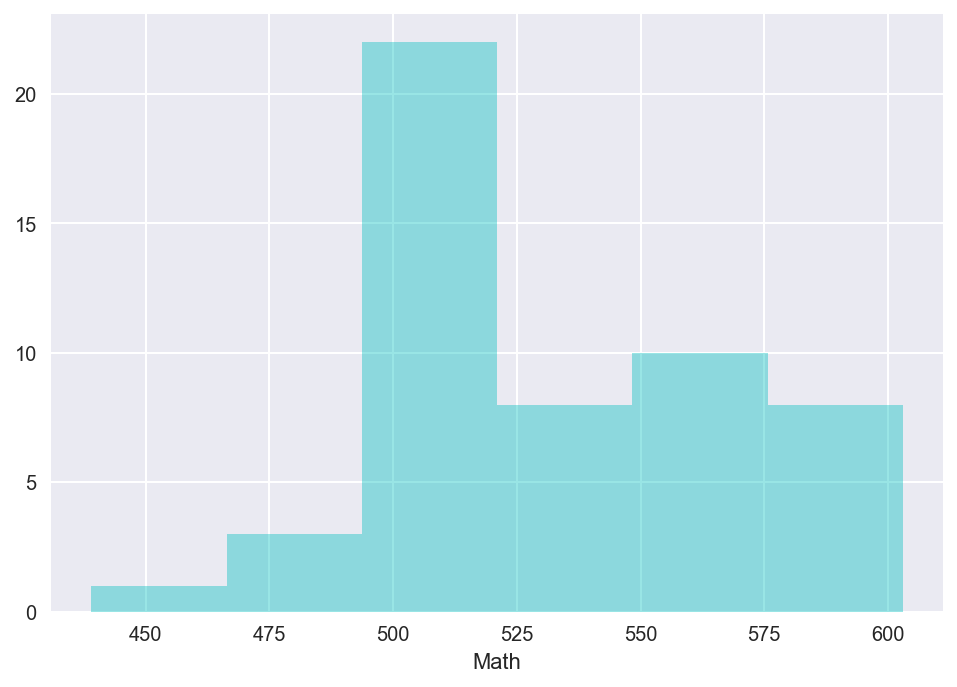

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(sat_df.Math, color='c', kde=False)

<div class="alert alert-block alert-info"> 
<h3>Distribution plot for Verbal</h3>

</div class>

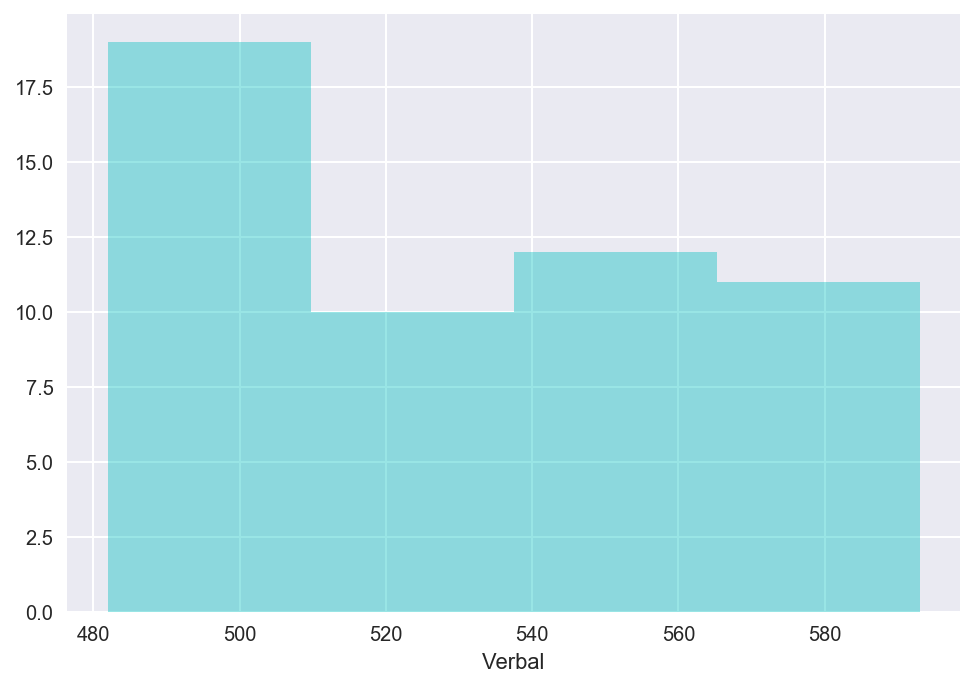

In [12]:
sns.distplot(sat_df.Verbal, color='c', kde=False)


<div class="alert alert-block alert-info"> 

<h3>Distribution plot for Rate</h3>

</div class>

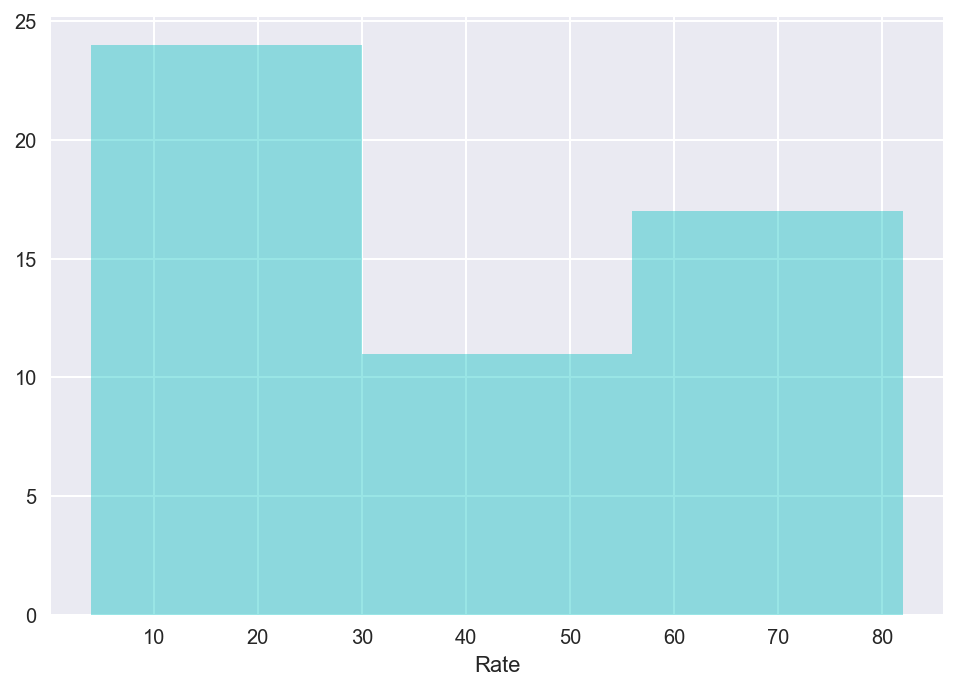

In [13]:
sns.distplot(sat_df.Rate, color='c', kde=False)


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

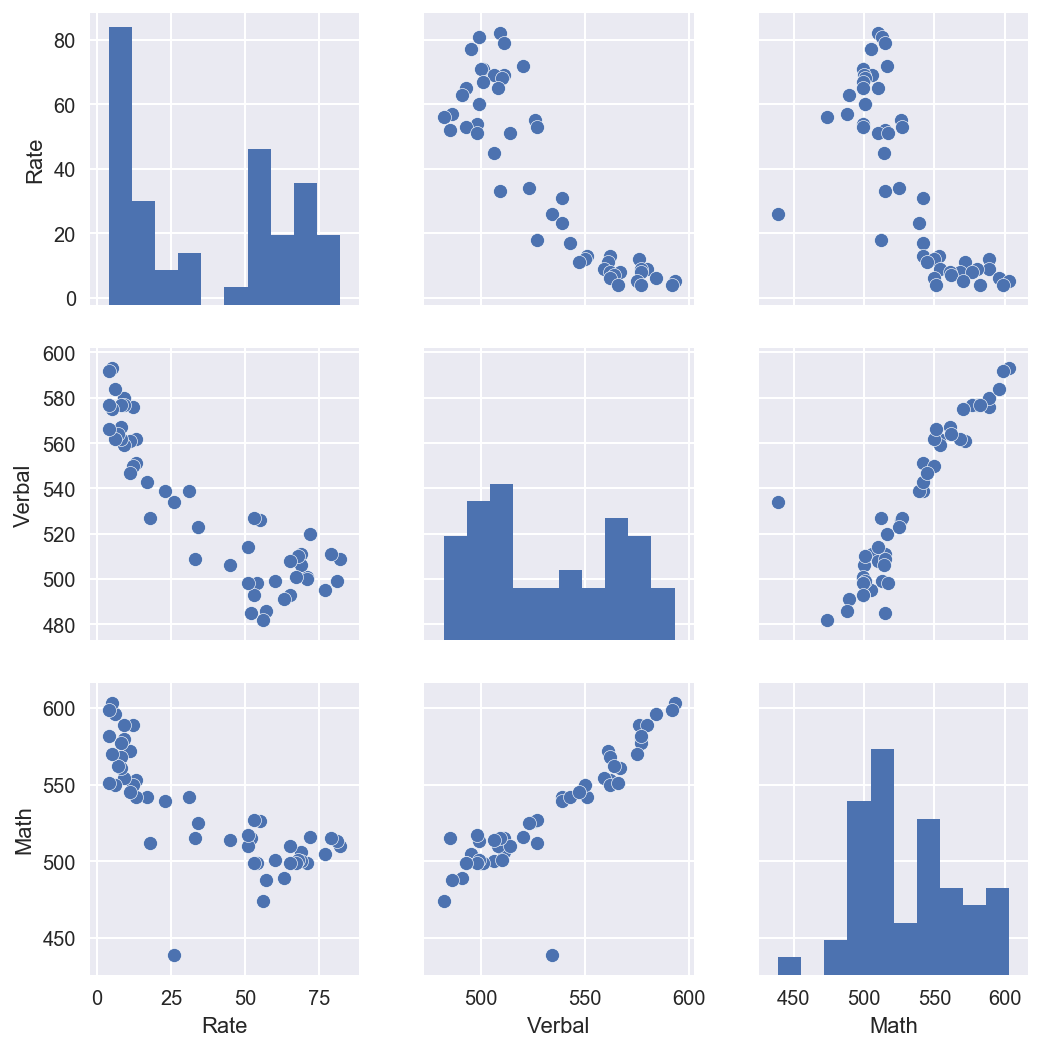

In [14]:
sns.pairplot(sat_df, palette='pkmn_colors')

<div class="alert alert-block alert-success">
ANALYSIS
</div class>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<div class="alert alert-block alert-info"> 

<h3>Stacked Histogram of Verbal and Math</h3>

</div class>

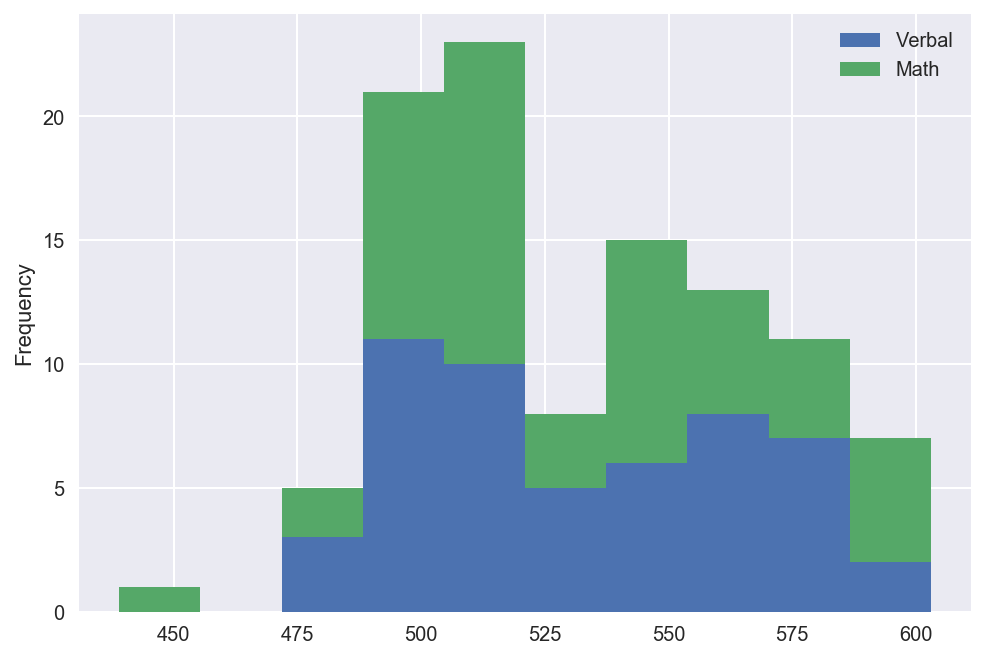

In [15]:
verbal_math = sat_df[['Verbal', 'Math']]

verbal_math.plot.hist(stacked = True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

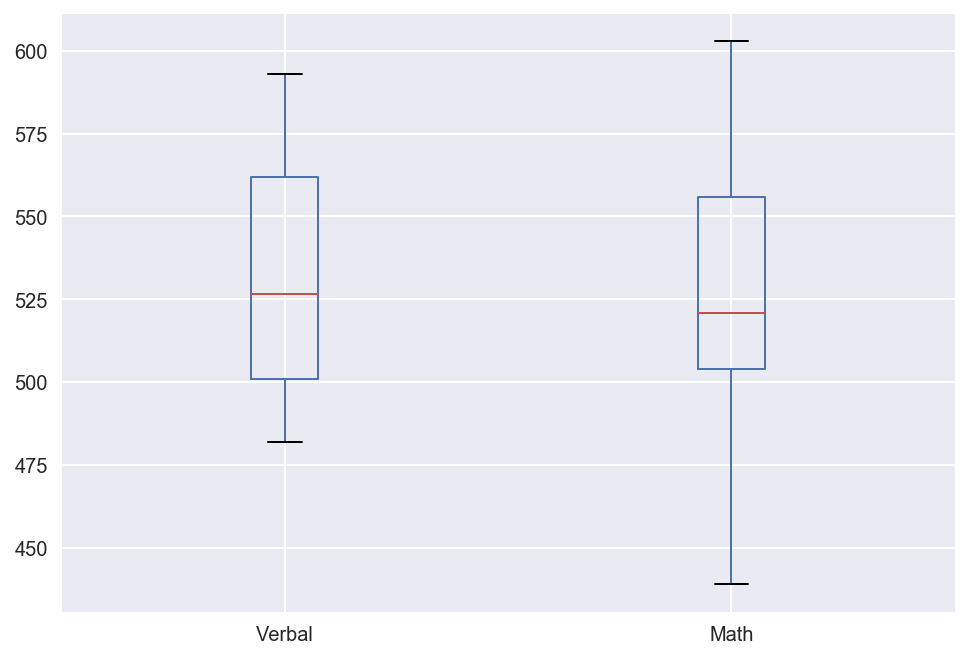

In [16]:
verbal_math.boxplot()

<div class="alert alert-block alert-success">
Using a box plot, you are able to see the basic descriptive statistics in a glance. Histograms would give more information on the distribution while scatterplots would provide more information on correlation.
<p>
The scale of 'Rate', is different from 'Math' and 'Verbal' as they are test scores while 'Rate' is a percentage.

</div class>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Standardize and plot on the same box plot

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




<div class="alert alert-block alert-info"> 

<h3>States Above The Average Verbal Score</h3>

</div class>

In [17]:
verbal_mean = sat_df.Verbal.mean()
print verbal_mean

sat_df[["State", "Verbal"]][sat_df['Verbal'] > verbal_mean]
sat_df.reset_index(drop=True)

532.019230769


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

<div class="alert alert-block alert-info"> 

<h3>States Above The Median Verbal Score</h3>

</div class>

In [18]:
verbal_median = sat_df.Verbal.median()
print verbal_median

sat_df[["State", "Verbal"]][sat_df['Verbal'] > verbal_median]
sat_df.reset_index(drop=True)

526.5


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

<div class="alert alert-block alert-info"> 

<h3>Difference of Verbal and Math Scores</h3>

</div class>

In [19]:
sat_df["Difference"] = sat_df.Verbal - sat_df.Math
sat_df

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

<div class="alert alert-block alert-info"> 

<h3>Data Frame With Top 10 States With The Greatest Gap</h3>

</div class>

In [20]:
difference_df = sat_df.sort_values(['Difference'], ascending=False).head(10)

difference_df.reset_index(drop=True)



,State,Rate,Verbal,Math,Difference
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15
3,AR,6,562,550,12
4,NM,13,551,542,9
5,TN,13,562,553,9
6,VA,68,510,501,9
7,DC,56,482,474,8
8,ME,69,506,500,6
9,OK,8,567,561,6


<div class="alert alert-block alert-info"> 

<h3>Data Frame With Top 10 States With The Greatest Gap Inverse</h3>

</div class>

In [21]:
difference_df_inverse = sat_df.sort_values(['Difference'], ascending=True).head(10)

difference_df_inverse.reset_index(drop=True)

,State,Rate,Verbal,Math,Difference
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14
3,IL,12,576,589,-13
4,WI,6,584,596,-12
5,MI,11,561,572,-11
6,NY,77,495,505,-10
7,IA,5,593,603,-10
8,MN,9,580,589,-9
9,All,45,506,514,-8


In [22]:
difference_df.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [23]:
difference_df_inverse.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


                Rate    Verbal      Math  Difference
Rate        1.000000 -0.886432 -0.773746   -0.101412
Verbal     -0.886432  1.000000  0.899871    0.052600
Math       -0.773746  0.899871  1.000000   -0.388219
Difference -0.101412  0.052600 -0.388219    1.000000


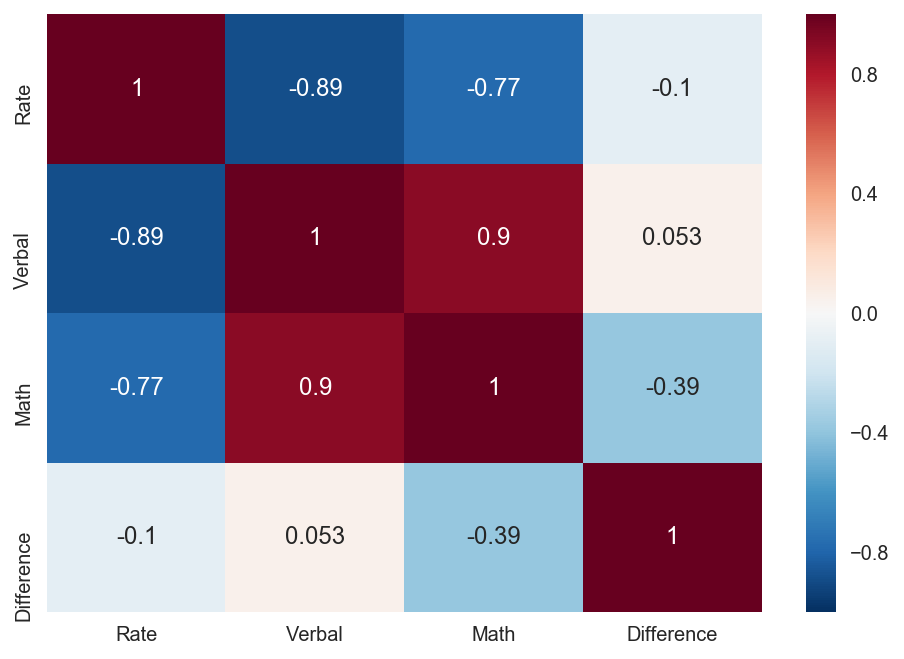

In [24]:
pprint(sat_df.corr())

sns.heatmap(sat_df.corr(), annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
sat_df.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
sat_df.cov()

,Rate,Verbal,Math,Difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Difference,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
drugs_csv = './drug-use-by-age.csv'

In [28]:
drugs_df = pd.read_csv(drugs_csv)

drugs_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


<div class="alert alert-block alert-warning">

## Replacing entries of '-' with 0.0 (float).

</div class>

In [29]:
drugs_df.replace('-', float(0), inplace = True)

drugs_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


<div class="alert alert-block alert-warning">

## Changing all columns to float.

</div class>

In [30]:
replace_list = ['n', 'crack-frequency', 'cocaine-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']

for i in replace_list:
    drugs_df[i] = drugs_df[i].astype('float')

In [31]:
drugs_df.dtypes

age                         object
n                          float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [32]:
drugs_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

>The National Survey on Drug Use and Health (NSDUH) series (formerly titled National Household Survey on Drug Abuse) primarily measures the prevalence and correlates of drug use in the United States. The surveys are designed to provide quarterly, as well as annual, estimates. <b>Information is provided on the use of illicit drugs, alcohol, and tobacco among members of United States households aged 12 and older.</b>

><b>Questions included age at first use as well as lifetime, annual, and past-month usage for the following drug classes</b>: marijuana, cocaine (and crack), hallucinogens, heroin, inhalants, alcohol, tobacco, and nonmedical use of prescription drugs, including pain relievers, tranquilizers, stimulants, and sedatives. The survey covered substance abuse treatment history and perceived need for treatment, and included questions from the Diagnostic and Statistical Manual (DSM) of Mental Disorders that allow diagnostic criteria to be applied. 

>The survey included questions concerning treatment for both substance abuse and mental health-related disorders. Respondents were also asked about personal and family income sources and amounts, health care access and coverage, illegal activities and arrest record, problems resulting from the use of drugs, and needle-sharing. Questions introduced in previous administrations were retained in the 2012 survey, including questions asked only of respondents aged 12 to 17. 

>These "youth experiences" items covered a variety of topics, such as neighborhood environment, illegal activities, drug use by friends, social support, extracurricular activities, exposure to substance abuse prevention and education programs, and perceived adult attitudes toward drug use and activities such as school work. Several measures focused on prevention-related themes in this section. Also retained were questions on mental health and access to care, perceived risk of using drugs, perceived availability of drugs, driving and personal behavior, and cigar smoking. Questions on the tobacco brand used most often were introduced with the 1999 survey. For the 2008 survey, adult mental health questions were added to measure symptoms of psychological distress in the worst period of distress that a person experienced in the past 30 days and suicidal ideation. 

>In 2008, a split-sample design also was included to administer separate sets of questions (WHODAS vs. SDS) to assess impairment due to mental health problems. Beginning with the 2009 NSDUH, however, all of the adults in the sample received only the WHODAS questions. Background information includes gender, race, age, ethnicity, marital status, educational level, job status, veteran status, and current household composition.

<div class="alert alert-block alert-success">
Baby boomers are Americans aged 48-66 (born between 1946 and 1964).
<p>All of this data relates to use, which isn’t equivalent to abuse. 

## Data:
- Use: Percentage of those in an age group who used
- Frequency: Median number of times a user in an age group

## Assumptions:
- Marijuana usage includes illegal and legal outlets.
- Respondents age at first use is classified into age groups in the data.

## Limitations:
- No specific gender identification.

</div class>

<div class="alert alert-block alert-warning">

## Extracting columns that contains uses and frequencies into lists.

</div class>

In [33]:
#use = drugs_df['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']
#frequency = drugs_df['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']

use = []
frequency = []
for i in drugs_df.columns:
    if 'use' in i:
        use.append(i)
    elif 'frequency' in i:
        frequency.append(i)


In [34]:
use_group = drugs_df[use]
frequency_group = drugs_df[frequency]
age_group = drugs_df['age']


<div class="alert alert-block alert-warning">

## Line plot of all drug use in America.

</div class>

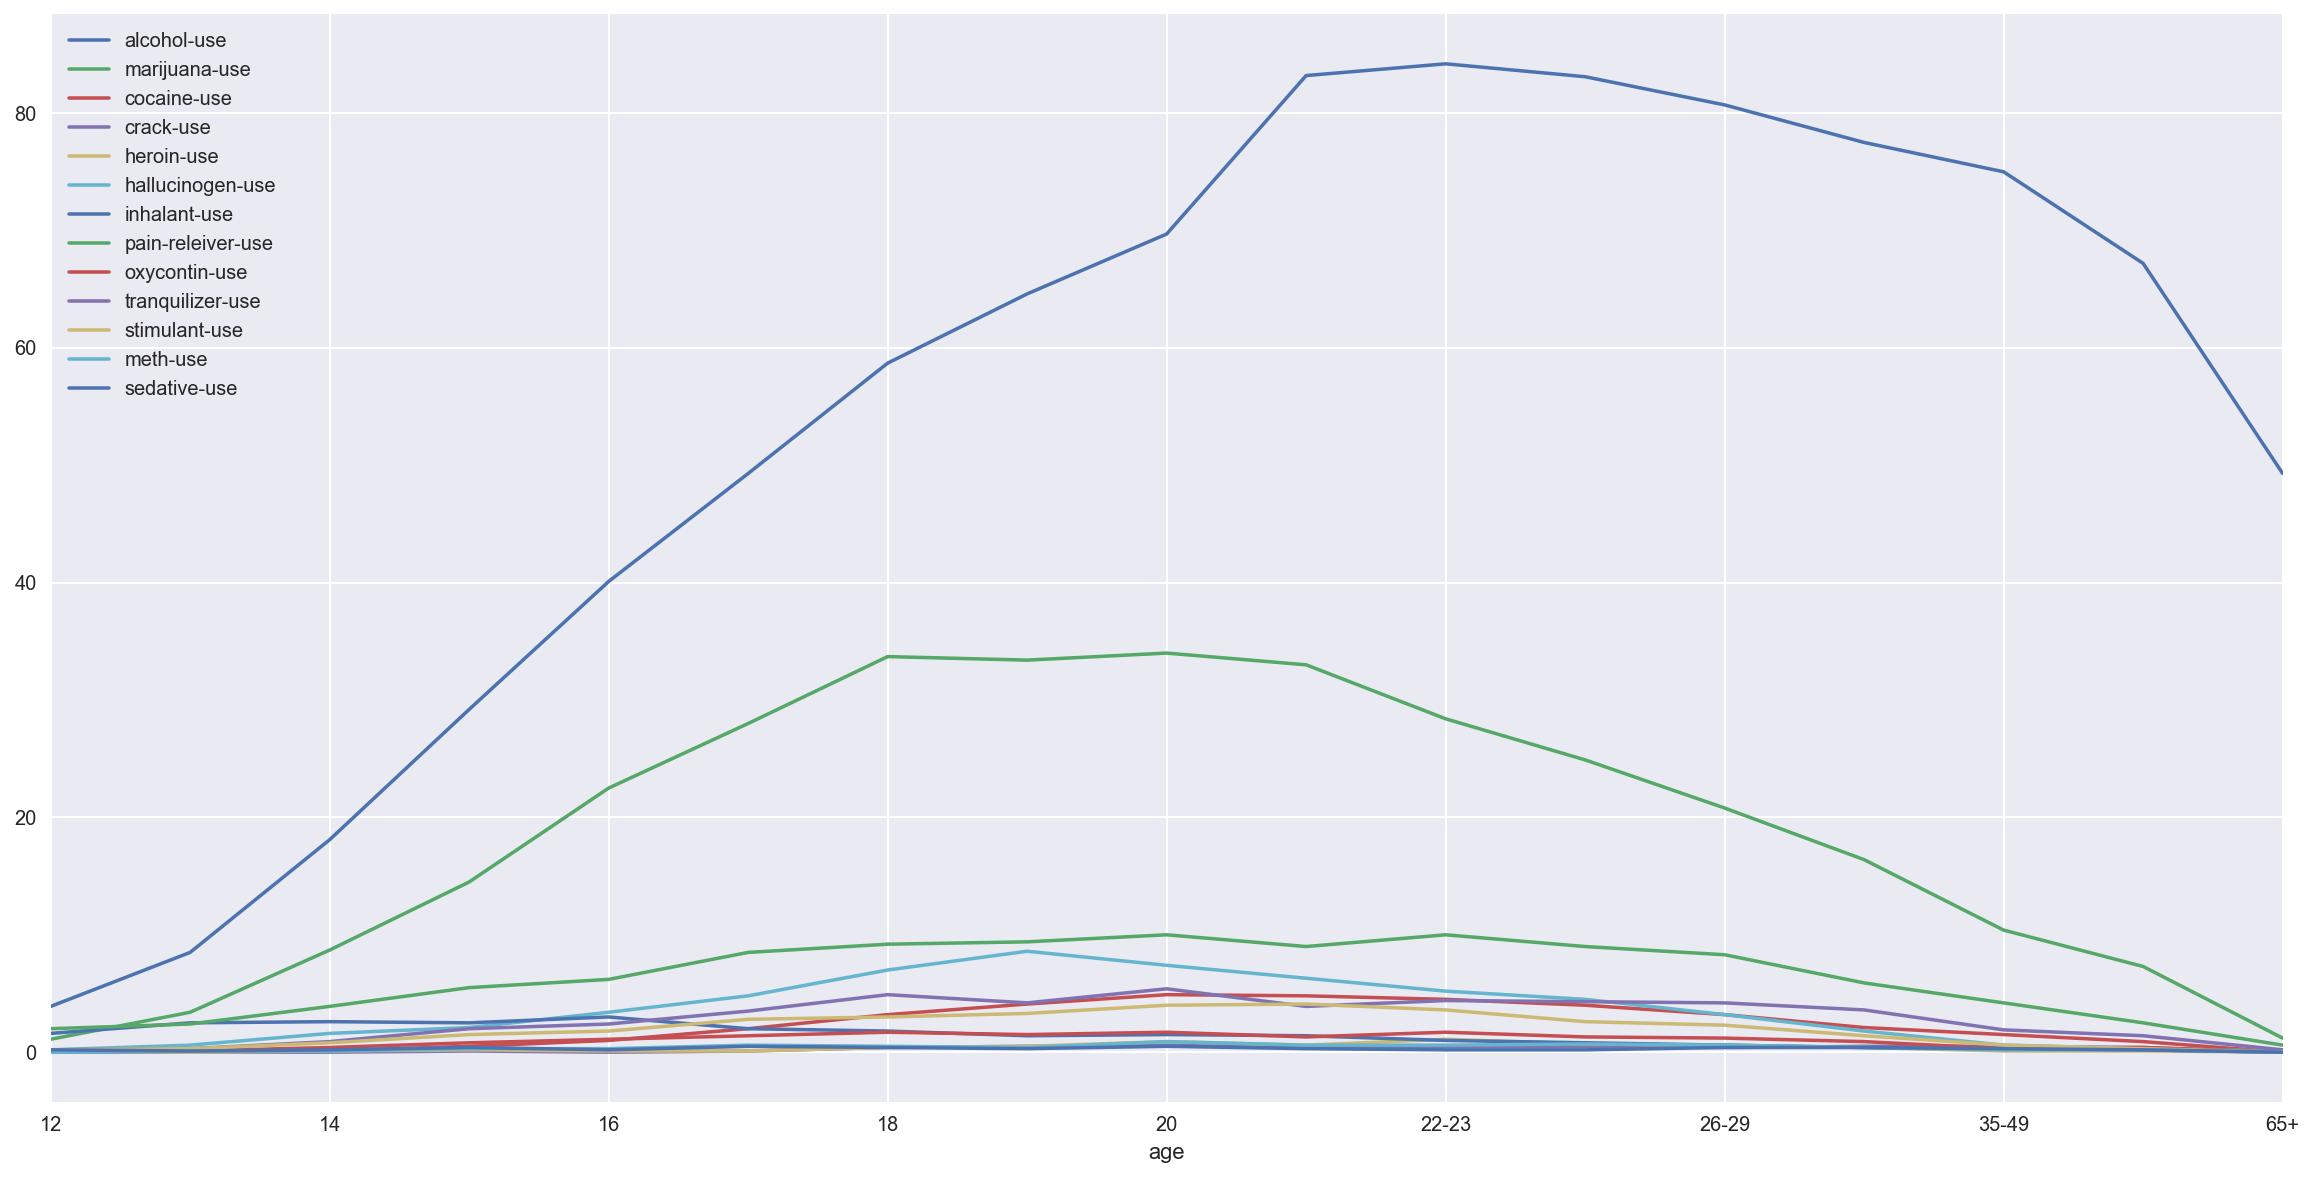

In [35]:
use_group.plot(x=age_group, figsize=(20,10))

<div class="alert alert-block alert-success">
The plot above depicts the relationship between the age of respondants and the percentage of those in the age group who uses the listed drugs.
<p>
At the top of the list is the use of alcohol showing a large amount of usage across all ages even from as young as 12.
<p>
Next in line is marijuana, which comes as no surprise as everyone likes to get high and there are medical marijuana readily available in some states.
<p>
Coming in third are pain relievers.
</div class>

___

In [36]:
use_top_three = drugs_df[['alcohol-use', 'marijuana-use', 'pain-releiver-use']]

In [37]:
#sns.barplot(x=age_group, y=use_group, data=drugs_df)

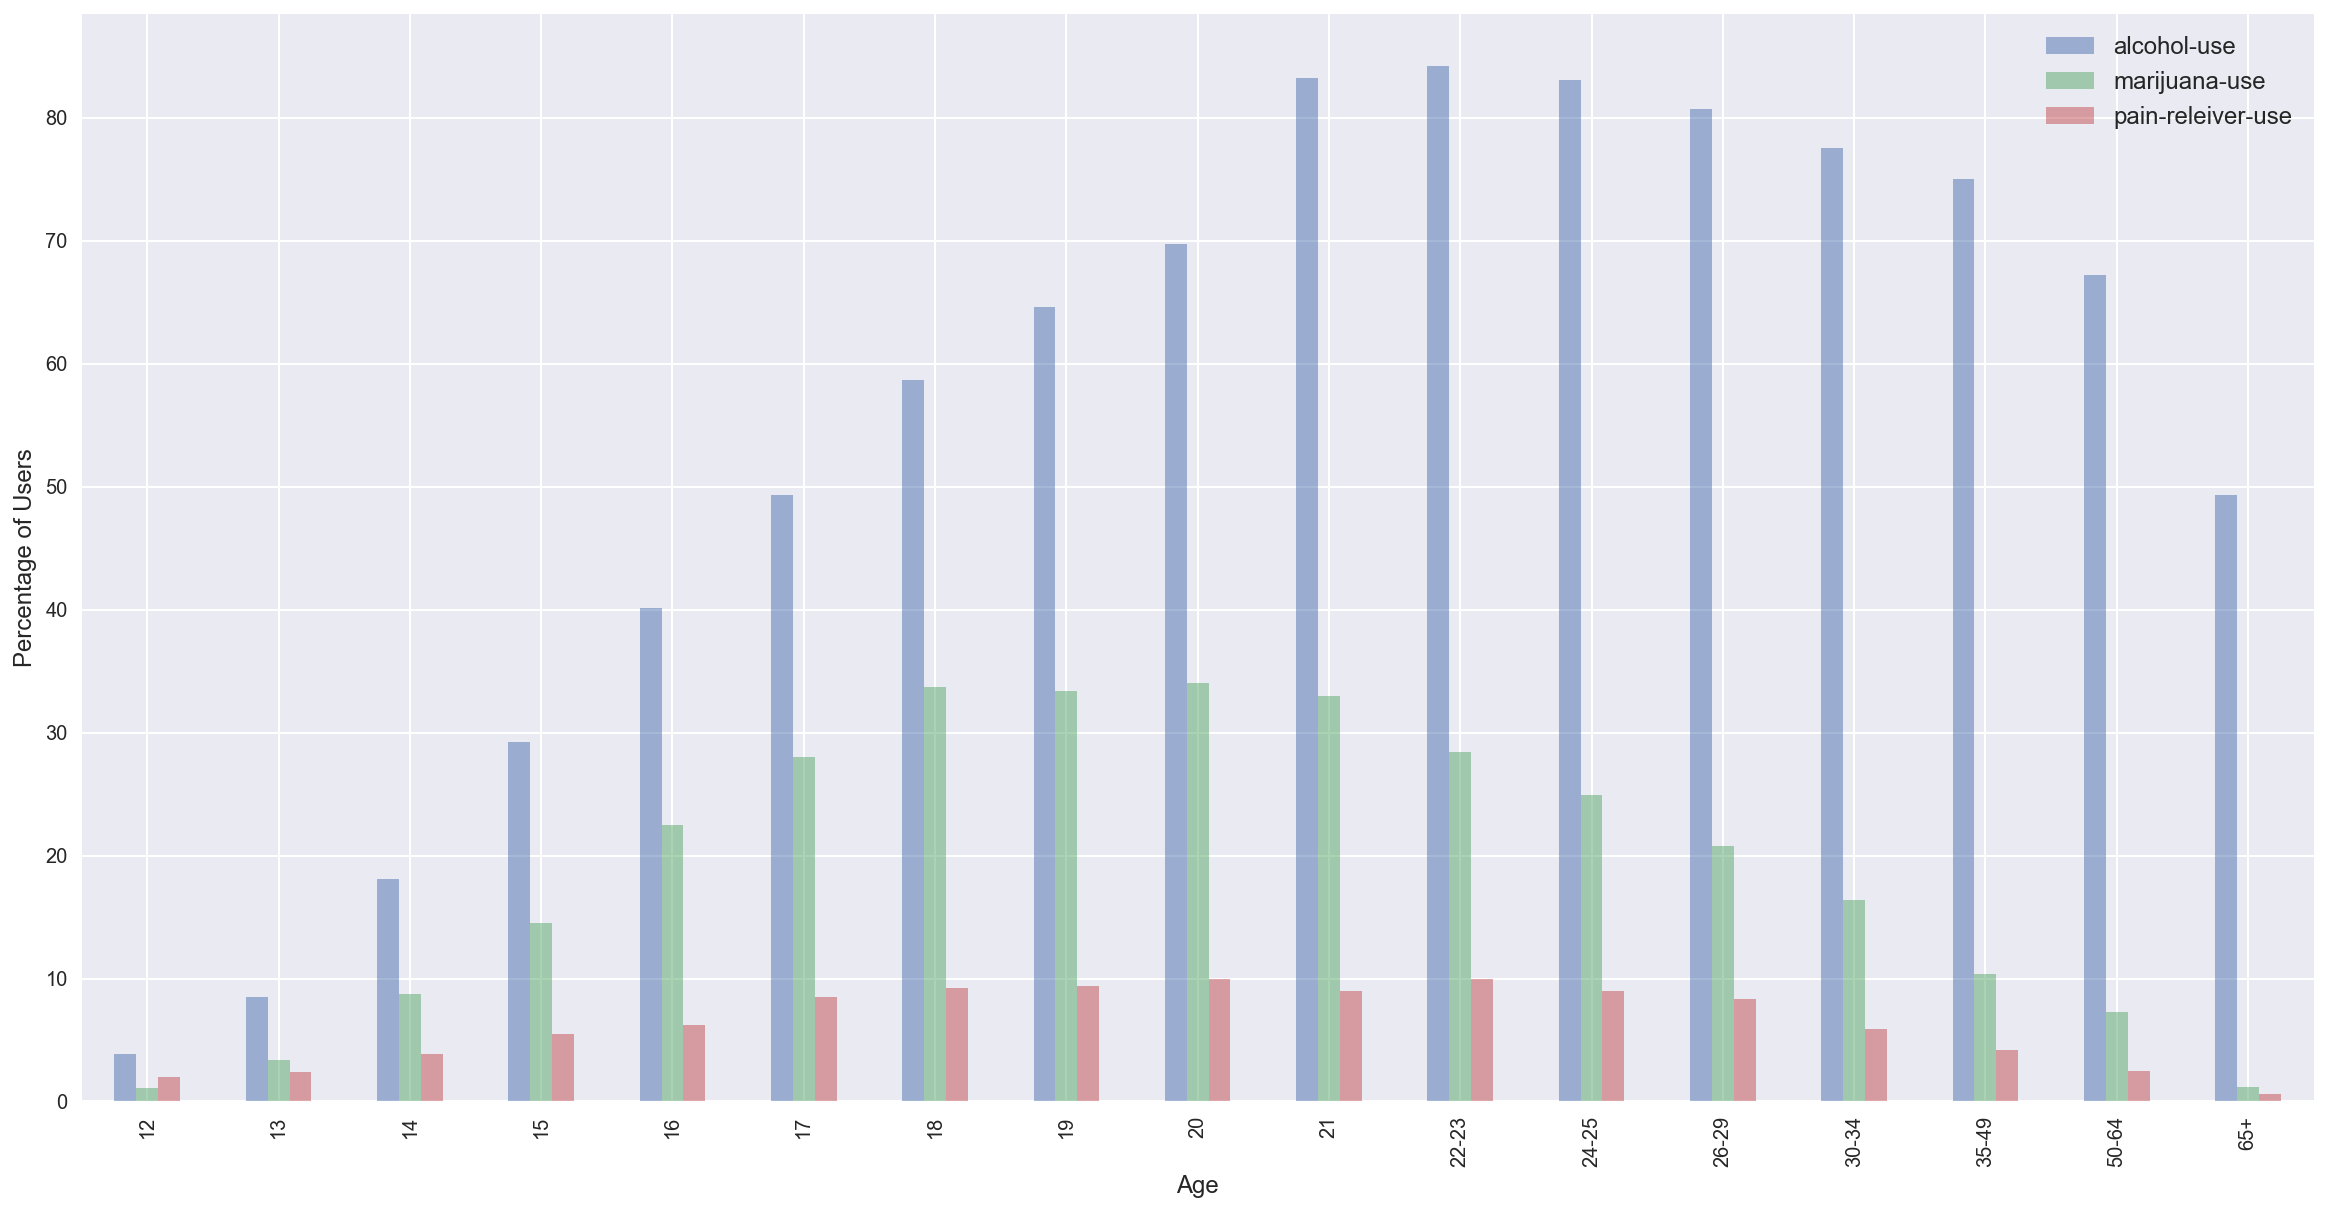

In [38]:
top_three_bar = use_top_three.plot.bar(x=age_group, alpha=0.5, figsize=(20,10))
top_three_bar.set_ylabel('Percentage of Users', fontsize=12)
top_three_bar.set_xlabel('Age', fontsize=12)
top_three_bar.legend(fontsize=12)

<div class="alert alert-block alert-success">

Observing the bar plot, it becomes clearer to notice the trends of usage over the the sampled age groups. 
<p>
### Alcohol Use
Noticeably, as one gets older the consumption of alchol increases significantly until it peaks at 22-23 and tapers down gradually. One can attribute the increase the lifestyle change when a teenager hits the young adult age (i.e. partying, bar hopping, college parties).

Alcohol consumption still remains high as one ages. Adults with spending power indulge in alcohol over brunches, lunches, dinners or just having a glass for no good reason.

### Marijuana Use
The trend of marijuana use follows the same pattern as alcohol usage. 
<p>
### Pain Relievers
These usage data are prescription pain relivers. It is unclear if they were consumed for medical or illicit purposes. Though the use of pain relievers tapers down past 30. Which is surprising as it iss common for adults consuming pain relievers to cope pain. Rather than what the data shows where teens show a higher proportion of its use.

</div class>
___

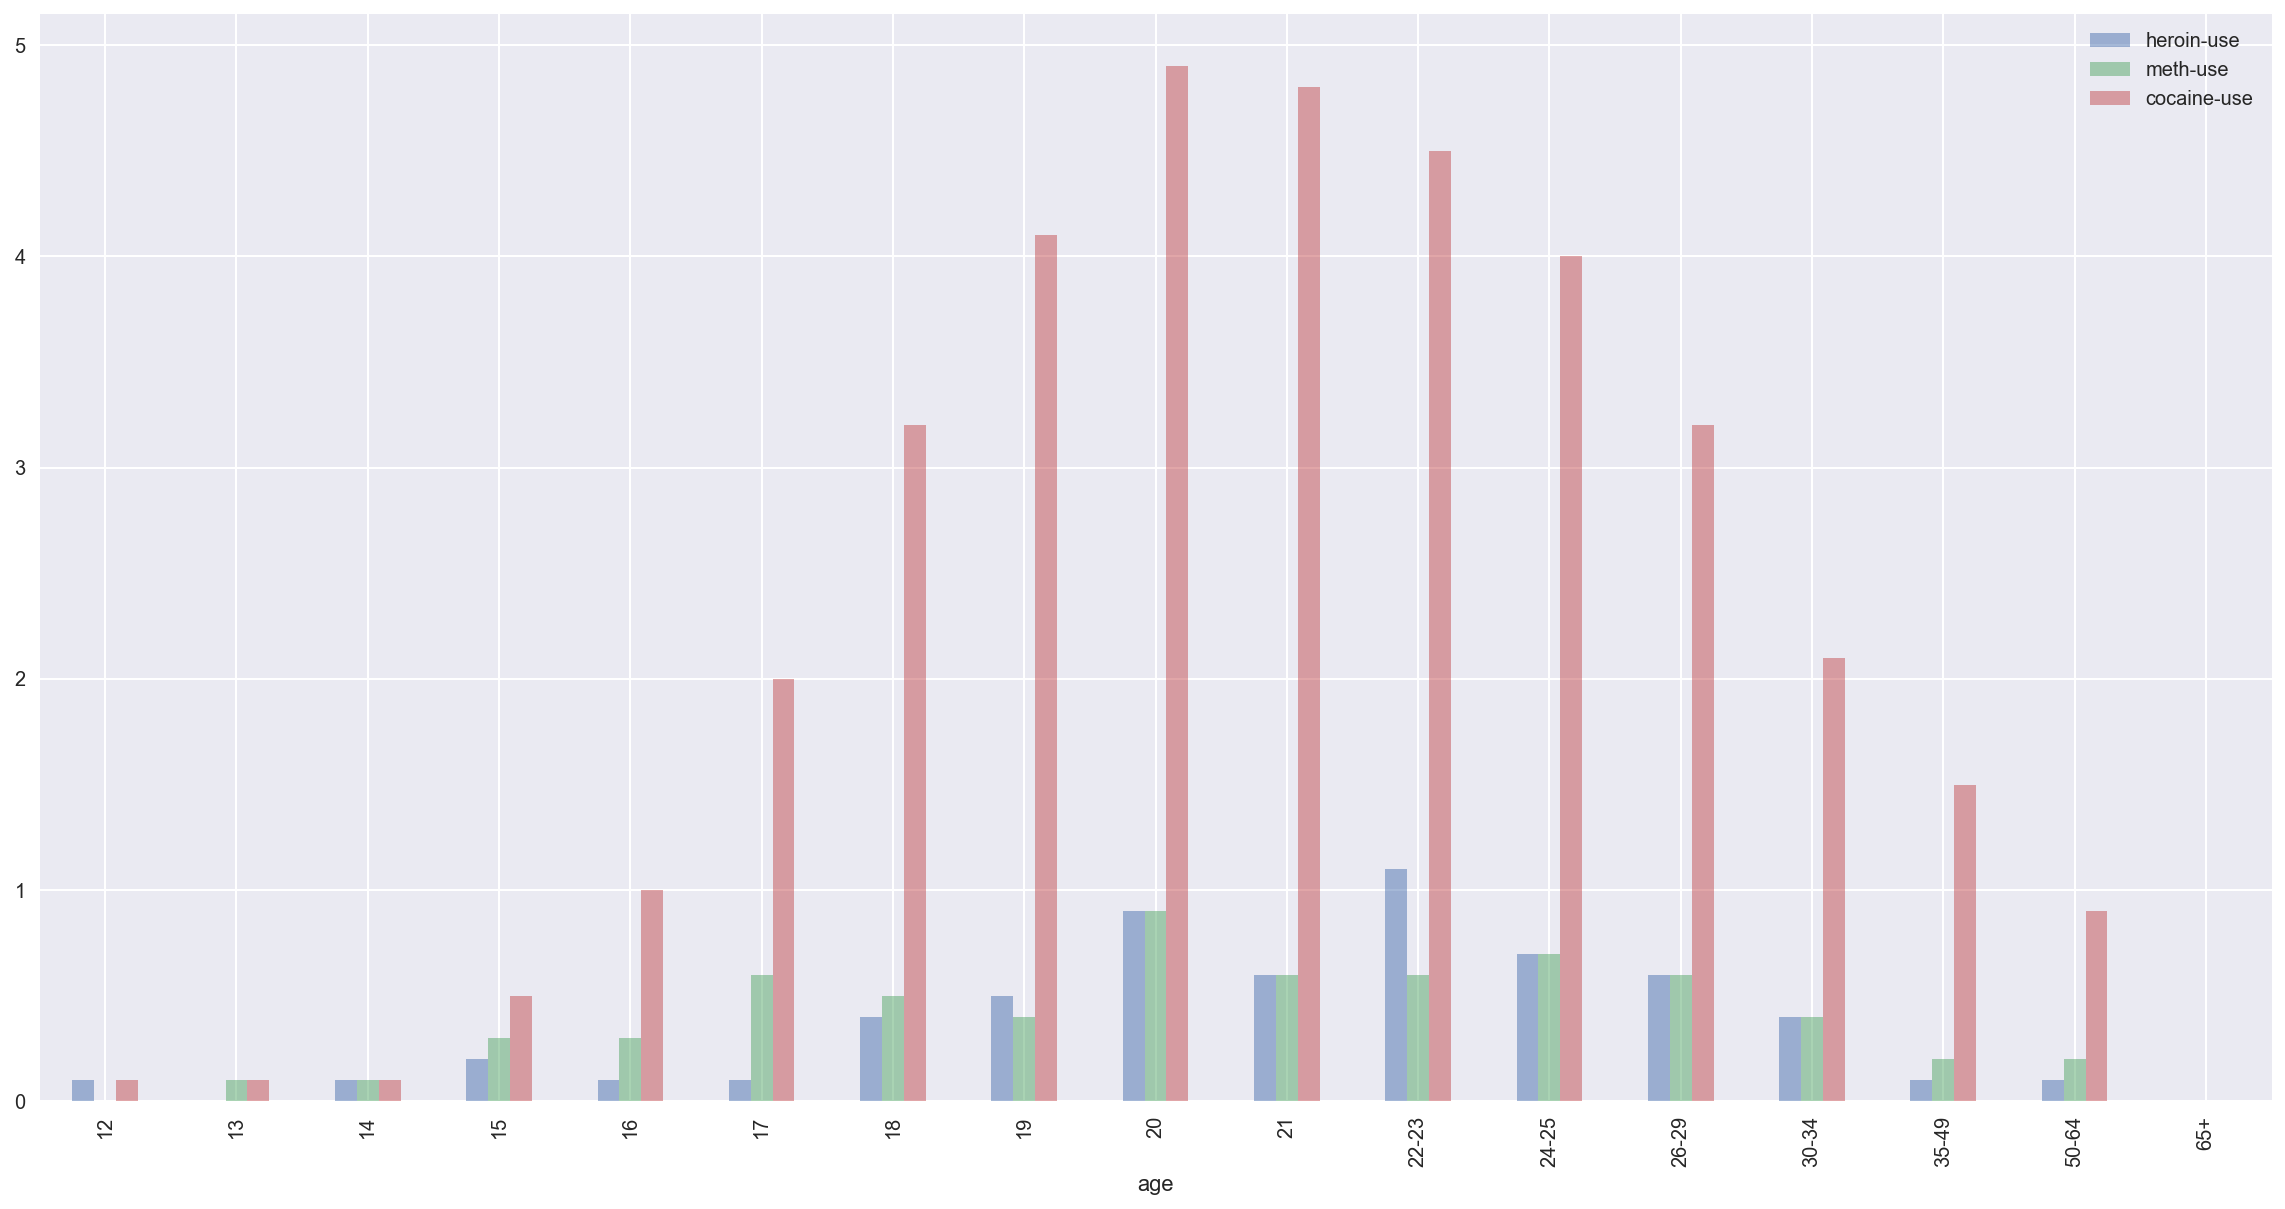

In [39]:
use_top_drugs = drugs_df[['heroin-use', 'meth-use', 'cocaine-use']]

use_top_drugs.plot.bar(x=age_group, alpha=0.5, figsize=(20,10))


<div class="alert alert-block alert-success">

Marijuana is taken out of the plot as its obvious that its a top drug in America.

These drugs are the commonly abused drugs in America and cocaine is at the top of charts.

</div class>
___

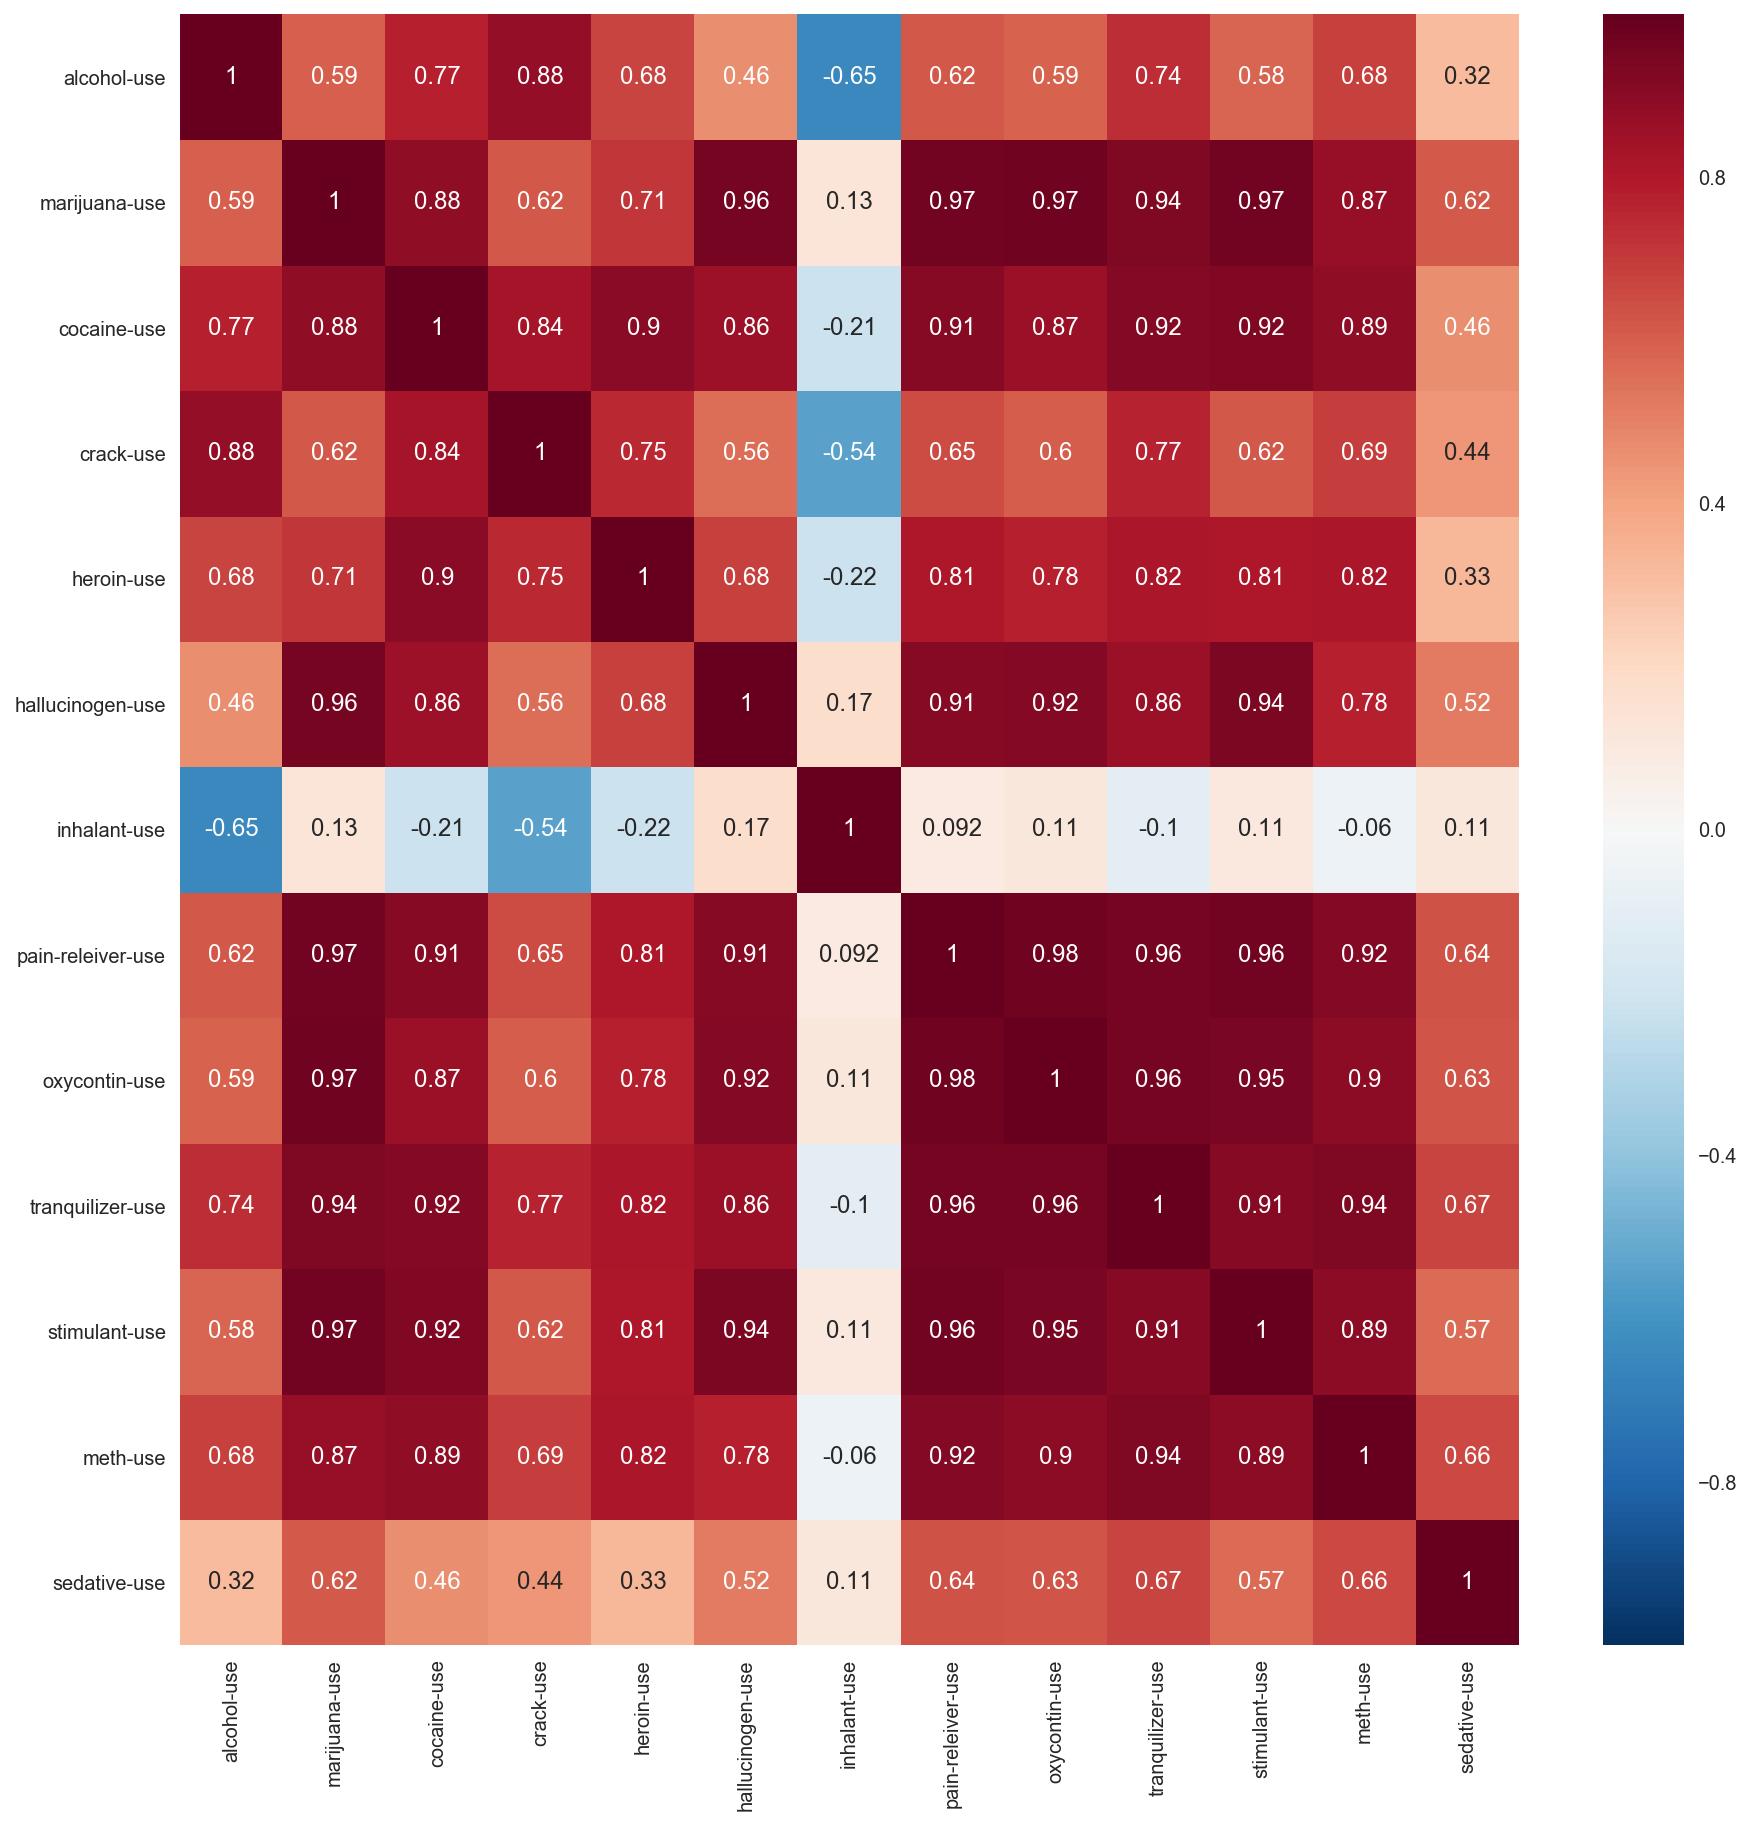

In [40]:
sns.set(rc={"figure.figsize": (15, 15)})

sns.heatmap(use_group.corr(), annot=True)

<div class="alert alert-block alert-success">

The heat map shows the correlation between the use of drugs and the age.

</div class>
___

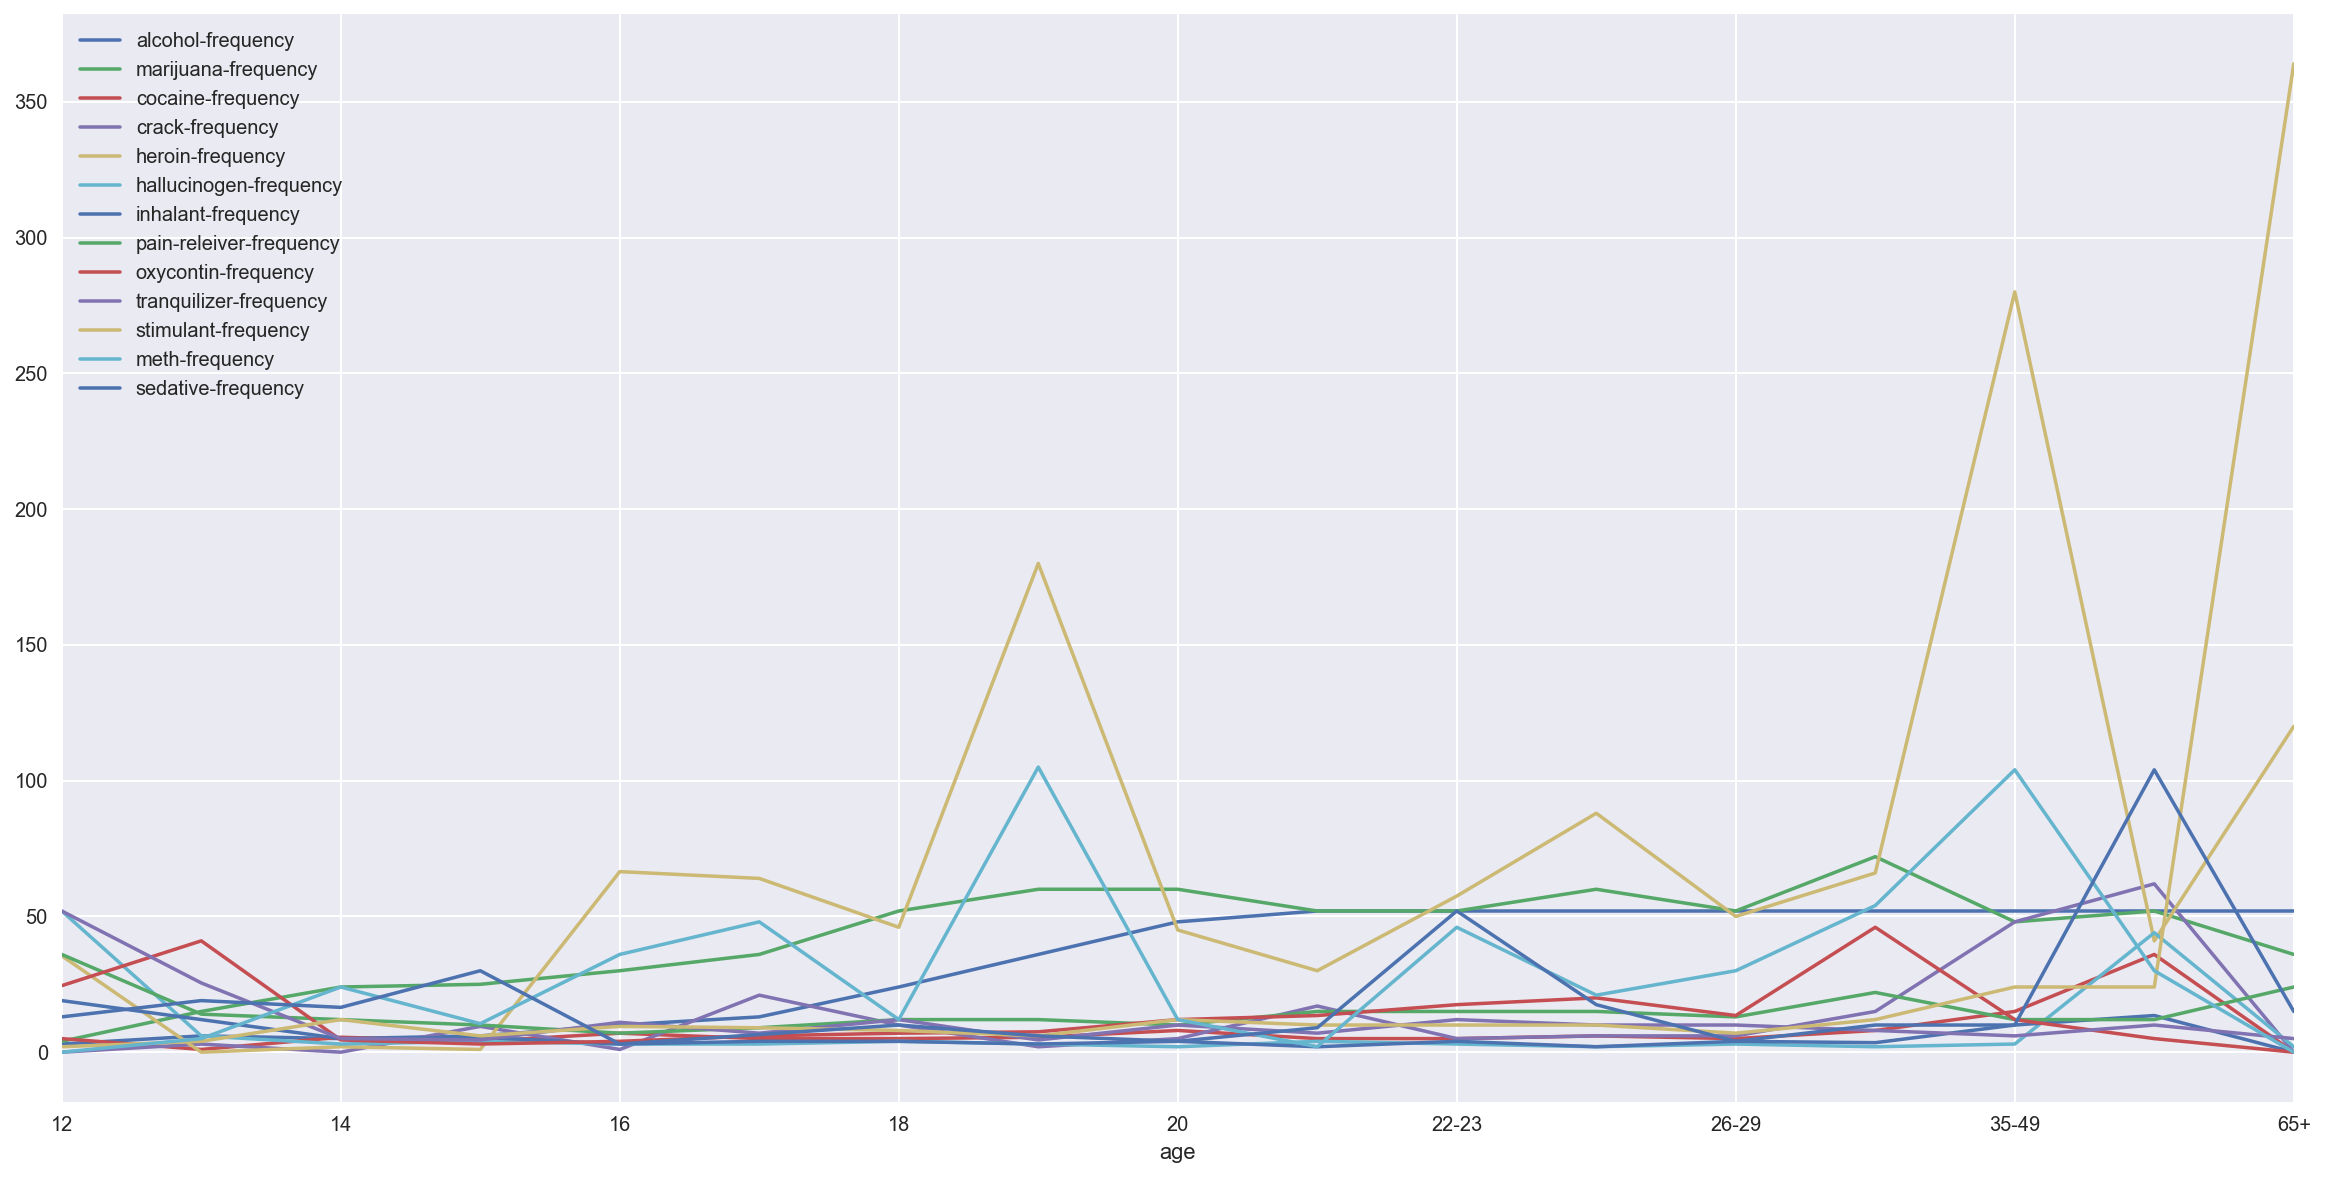

In [41]:
frequency_group.plot(x=age_group, figsize=(20,10))

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

<div class="alert alert-block alert-info"> 

<h3>Question and deliverables</h3>

If the type of drug consumed is independent on the age of the user.

** Null Hypothesis**: Usage of a particular type of drug is independent of age.

** Alternative Hypothesis**: Usage of a particular type of drug is dependent of age.

</div class>





In [42]:
underage_use = drugs_df.loc[0:9, ['age', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']]
underage_frequency = drugs_df.loc[0: 9, ['age', 'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']]
underage_age = drugs_df['age'].loc[0:9]

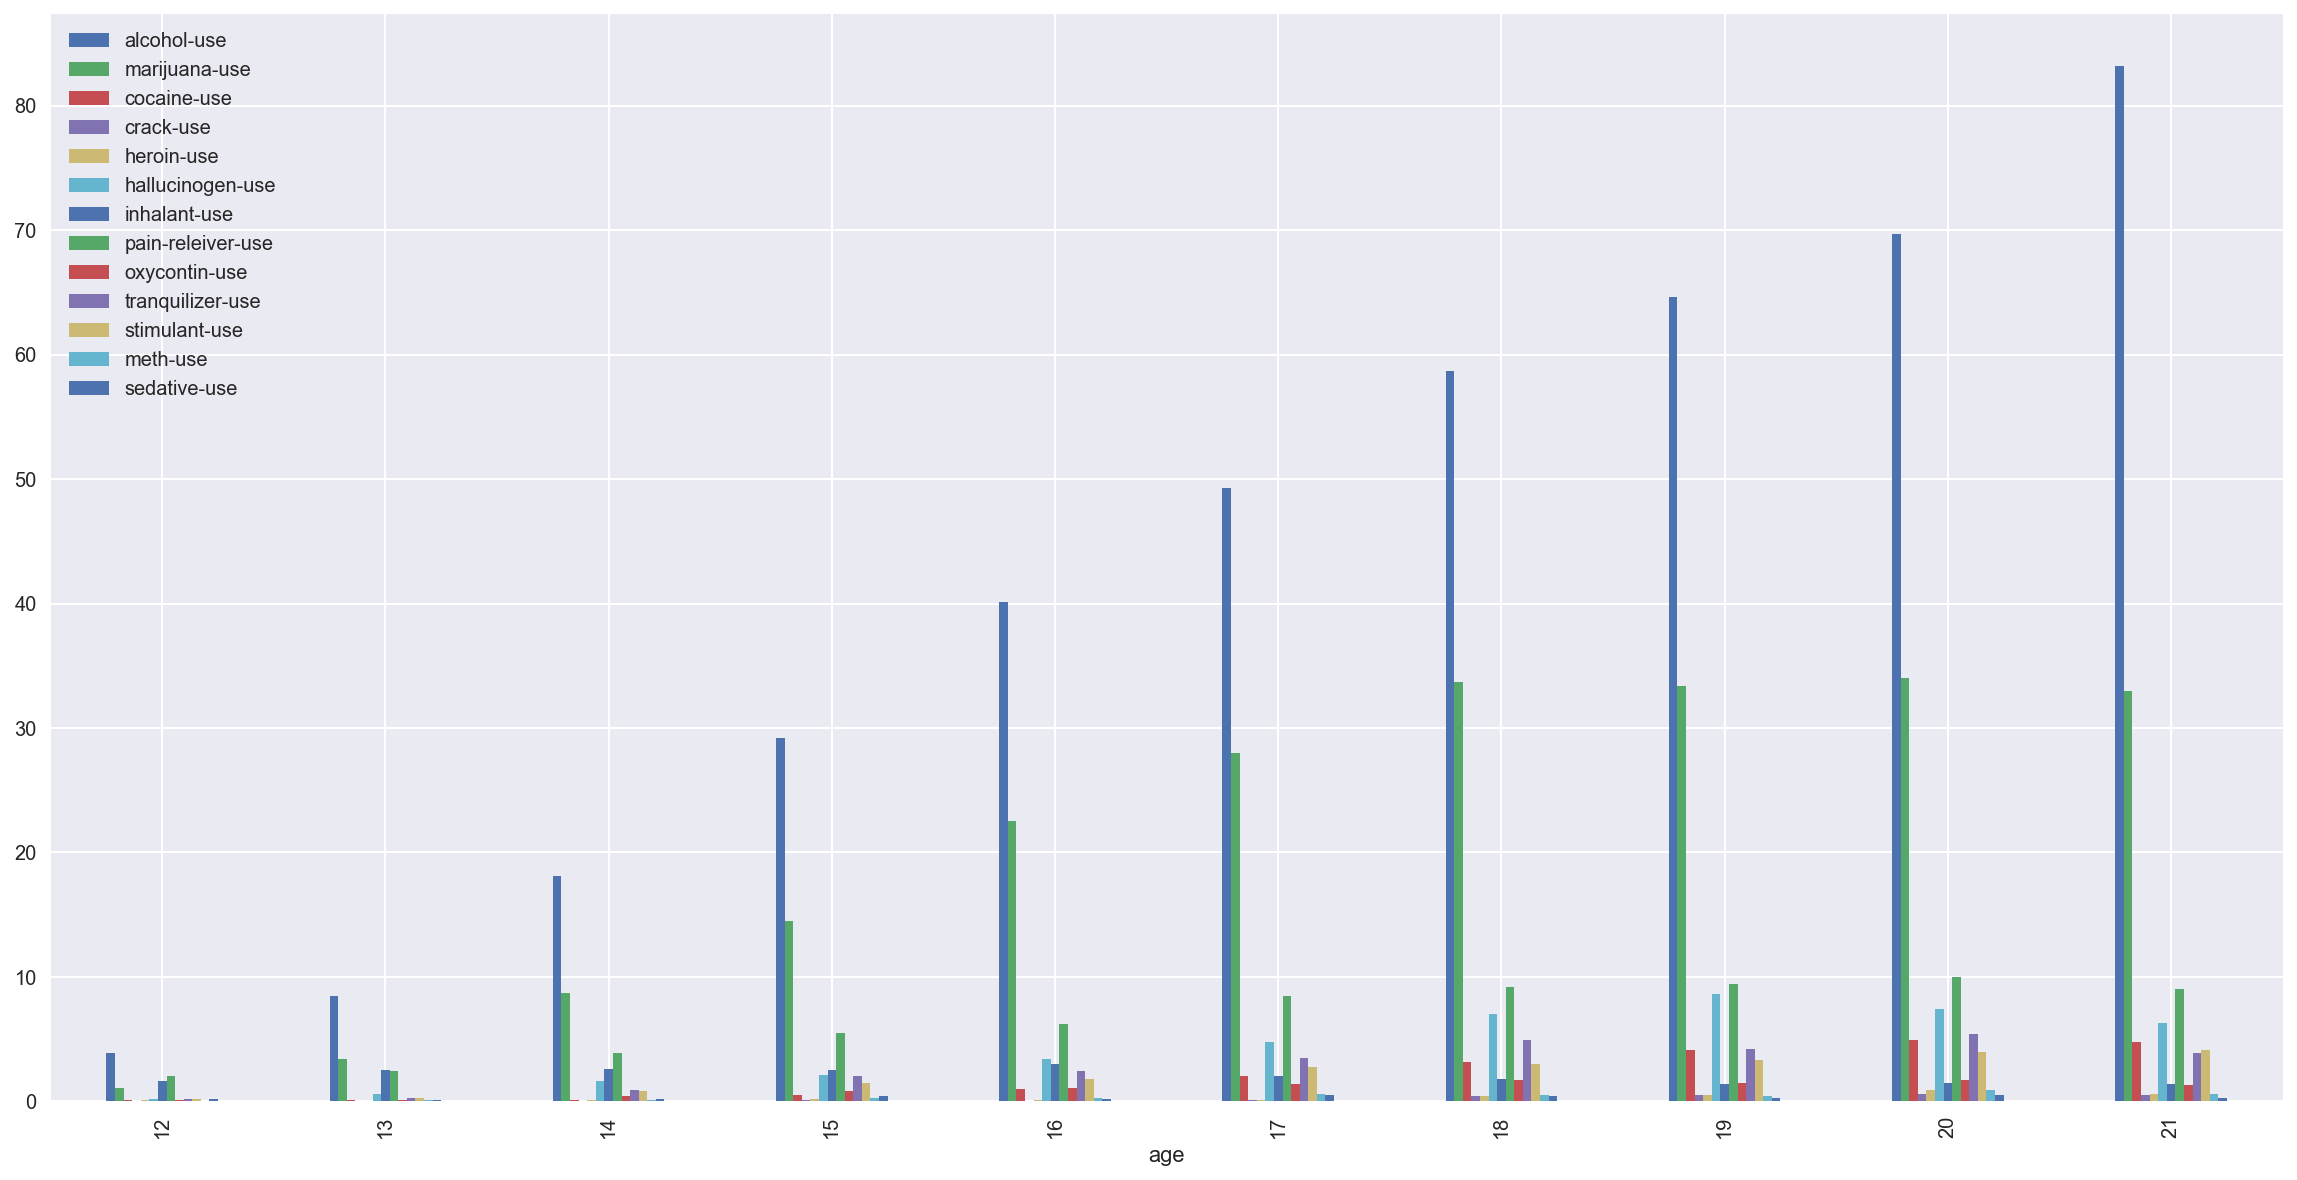

In [43]:
underage_use.plot.bar(x=underage_age, figsize=(20,10))

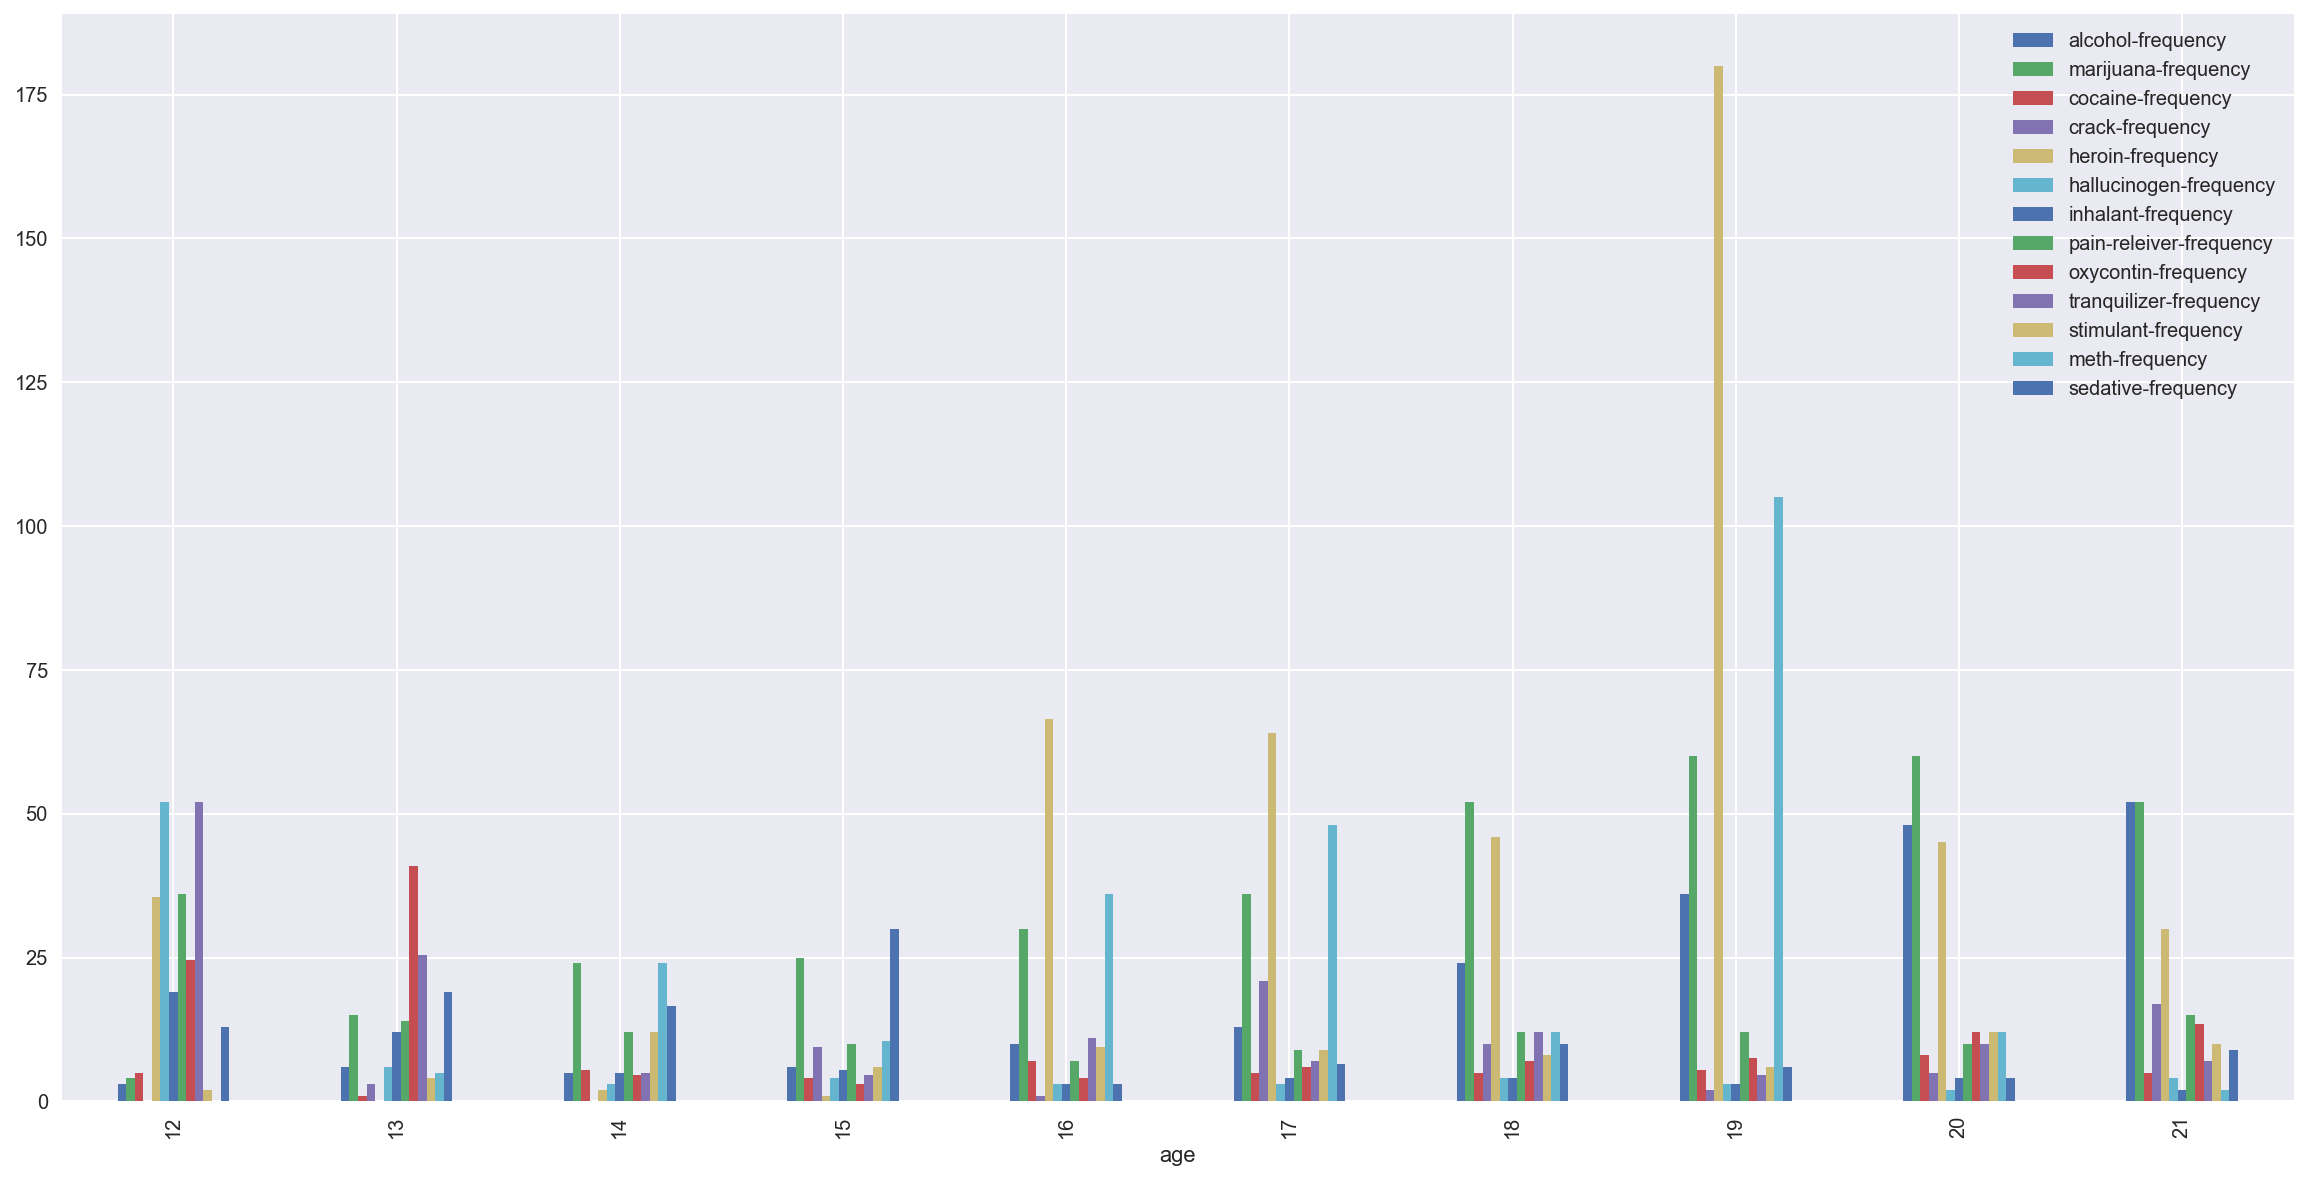

In [44]:
underage_frequency.plot.bar(x=underage_age, figsize=(20,10))

In [45]:
underage_use_focus = drugs_df.loc[0:9, ['age', 'cocaine-use', 'hallucinogen-use', 'pain-releiver-use', 'tranquilizer-use', 'stimulant-use']]
underage_frequency_focus = drugs_df.loc[0: 9, ['age', 'cocaine-frequency', 'hallucinogen-frequency', 'pain-releiver-frequency', 'tranquilizer-frequency', 'stimulant-frequency']]

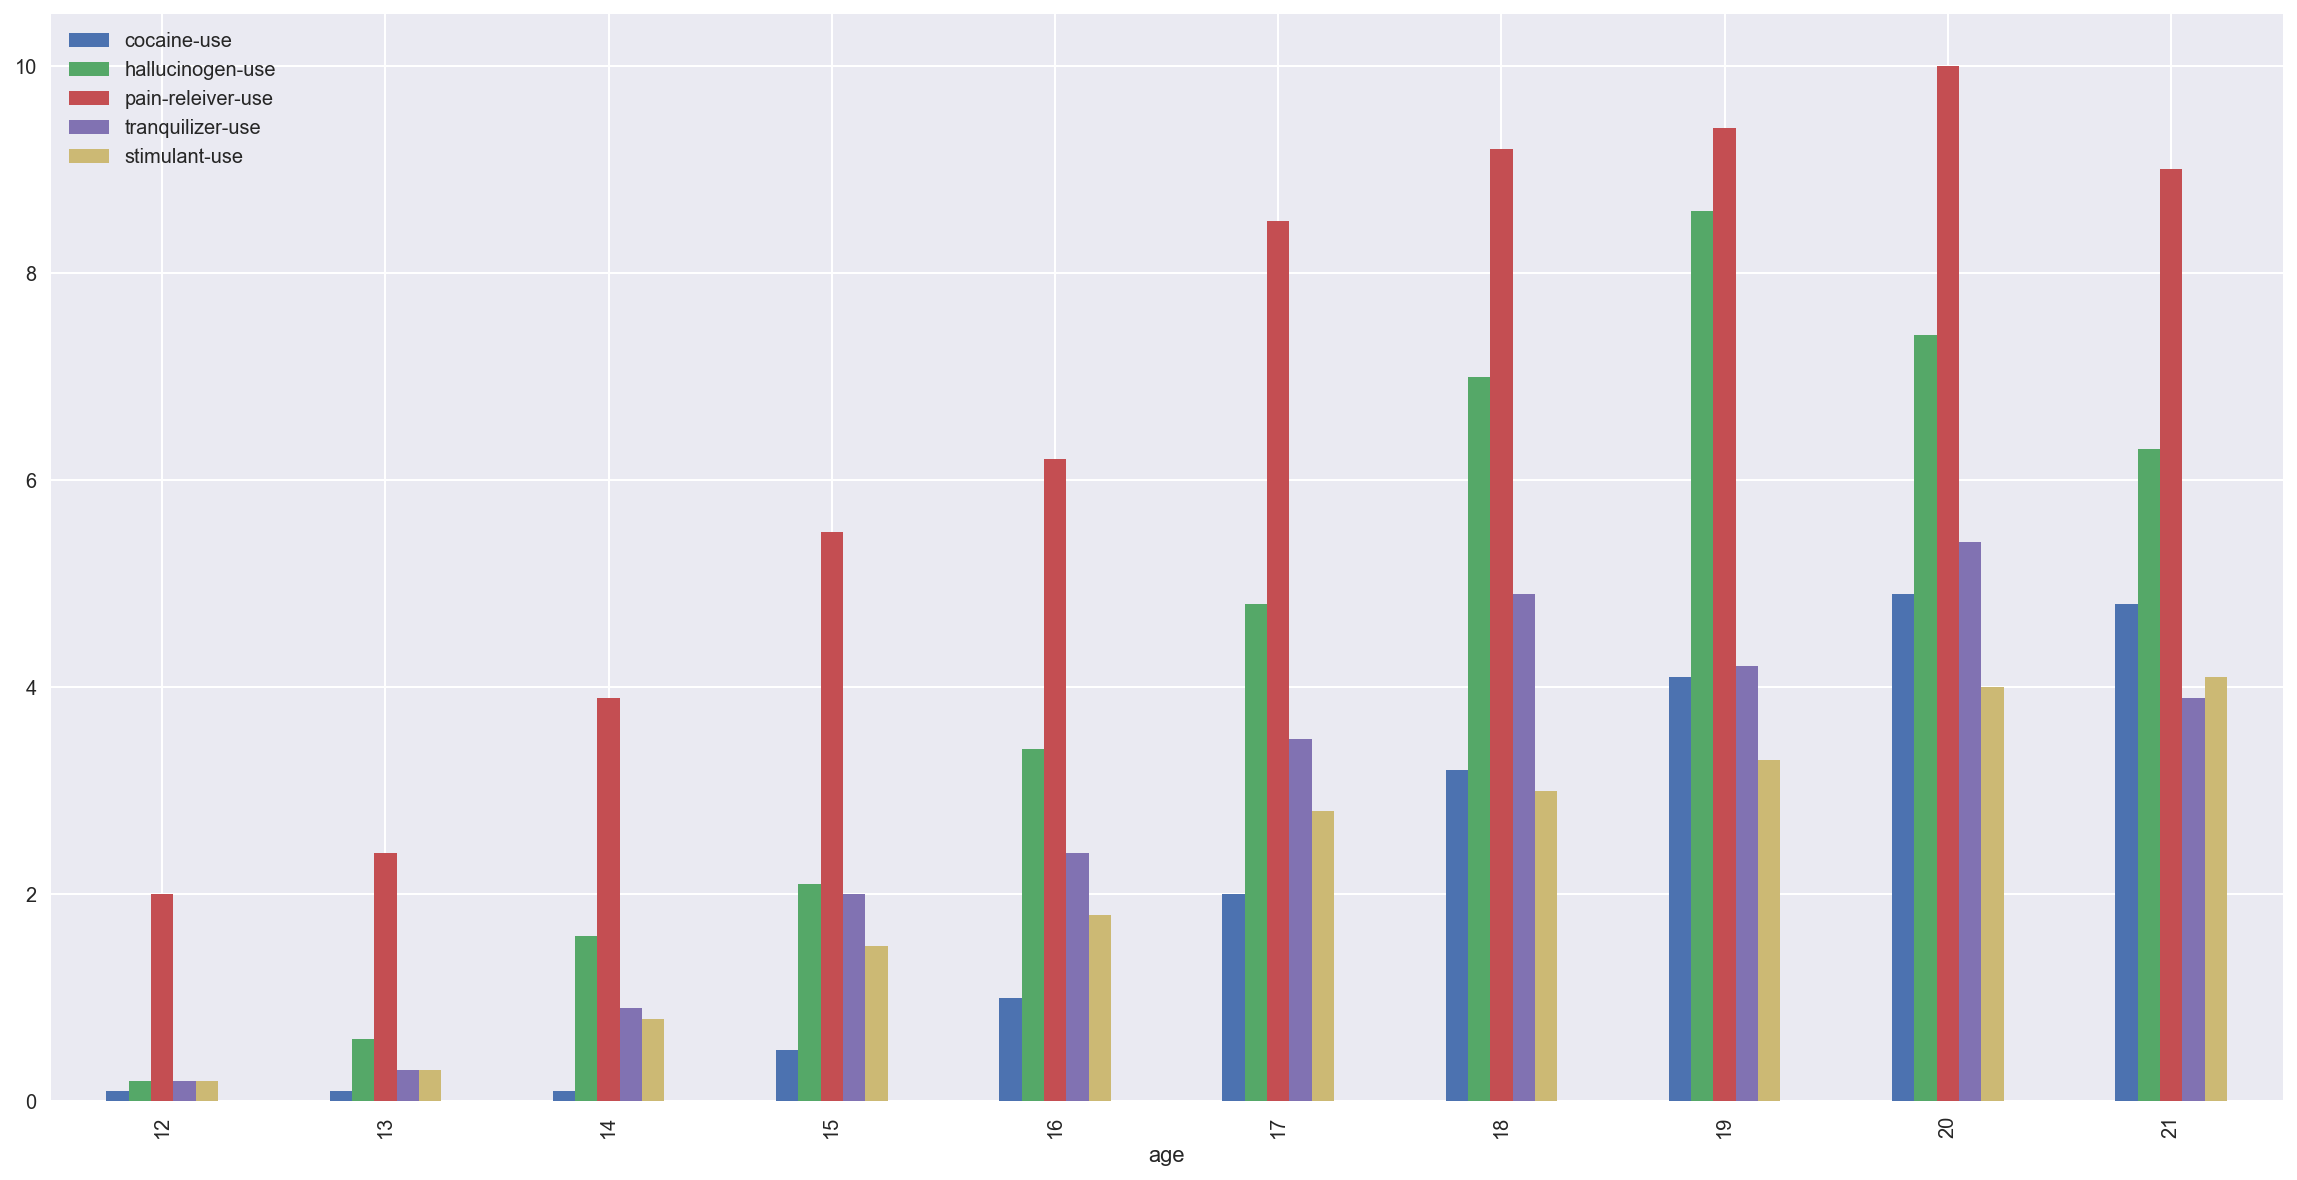

In [46]:
underage_use_focus.plot.bar(x=underage_age, figsize=(20,10))

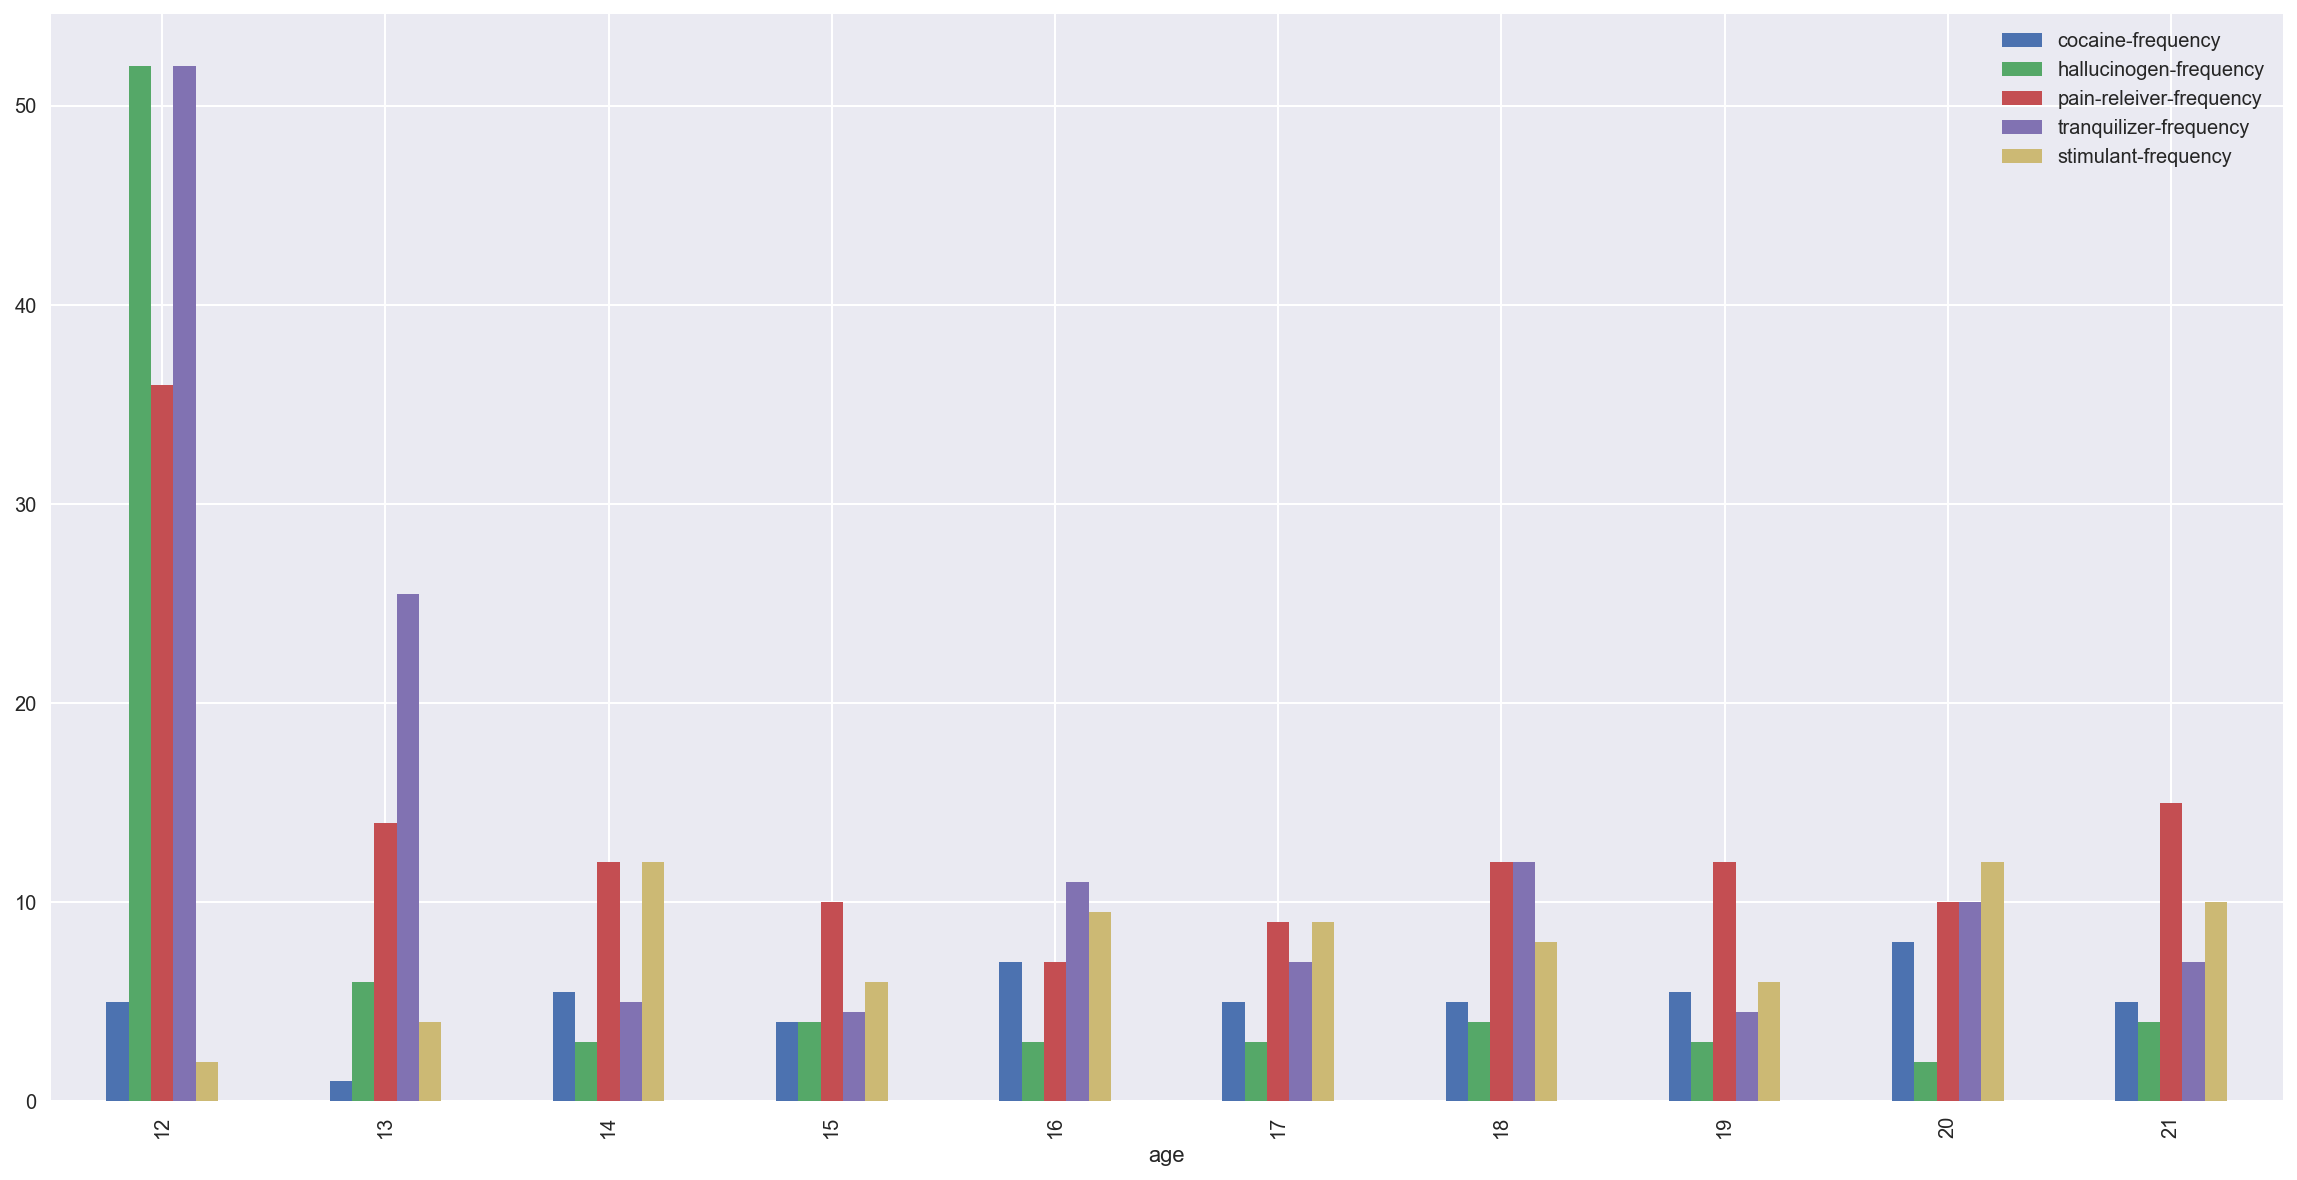

In [47]:
underage_frequency_focus.plot.bar(x=underage_age, figsize=(20,10))

In [48]:
underage_frequency_focus_cocaine = drugs_df[['age', 'cocaine-use']]
underage_frequency_focus_cocaine["non-cocaine-use"] = (100 - underage_frequency_focus_cocaine['cocaine-use'])

underage_frequency_focus_cocaine.drop([10, 11, 12, 13, 14, 15, 16], inplace=True)

/Users/Gar-eeee-eet/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Gar-eeee-eet/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:
cocaine_matrix = underage_frequency_focus_cocaine.as_matrix(columns=['cocaine-use', 'non-cocaine-use'])

cocaine_results = stats.chi2_contingency(cocaine_matrix)
cocaine_chi2 = cocaine_results[0]
cocaine_pvalue = cocaine_results[1]

print cocaine_chi2, cocaine_pvalue

17.7322932378 0.0384095467333


<div class="alert alert-block alert-success">

For cocaine, pvalue is 3.84% which is lower than the alpha of 5%, we reject H0.
There is a possibility that the freuqency of cocaine use is dependent of age.
</div class>
___

In [50]:
underage_frequency_focus_hallucinogen = drugs_df[['age', 'hallucinogen-use']]
underage_frequency_focus_hallucinogen["non-hallucinogen-use"] = (100 - underage_frequency_focus_hallucinogen['hallucinogen-use'])

underage_frequency_focus_hallucinogen.drop([10, 11, 12, 13, 14, 15, 16], inplace=True)


/Users/Gar-eeee-eet/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Gar-eeee-eet/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
hallucinogen_matrix = underage_frequency_focus_hallucinogen.as_matrix(columns=['hallucinogen-use', 'non-hallucinogen-use'])

hallucinogen_results = stats.chi2_contingency(hallucinogen_matrix)
hallucinogen_chi2 = hallucinogen_results[0]
hallucinogen_pvalue = hallucinogen_results[1]

print hallucinogen_chi2, hallucinogen_pvalue

20.6233223979 0.0144321077857


<div class="alert alert-block alert-success">

For hallucinogen, pvalue is 1.44% which is lower than the alpha of 5%, we reject H0.
There is a possibility that the freuqency of hallucinogen is dependent of age.
</div class>
___

In [53]:
underage_frequency_focus_pain = drugs_df[['age', 'pain-releiver-use']]
underage_frequency_focus_pain["non-pain-releiver-use"] = (100 - underage_frequency_focus_pain['pain-releiver-use'])

underage_frequency_focus_pain.drop([10, 11, 12, 13, 14, 15, 16], inplace=True)


/Users/Gar-eeee-eet/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Gar-eeee-eet/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [54]:
pain_matrix = underage_frequency_focus_pain.as_matrix(columns=['pain-releiver-use', 'non-pain-releiver-use'])

pain_results = stats.chi2_contingency(pain_matrix)
pain_chi2 = pain_results[0]
pain_pvalue = pain_results[1]

print pain_chi2, pain_pvalue

13.4436964115 0.143535535999


<div class="alert alert-block alert-success">

For pain reliever, pvalue is 14.35% which is higer than the alpha of 5%, we do not reject H0.
There is a possibility that the freuqency of pain reliever use is independent of age.
</div class>
___

In [55]:
underage_frequency_focus_tranquilizer = drugs_df.loc[0: 9, ['age', 'tranquilizer-frequency']]
underage_frequency_focus_stimulant = drugs_df.loc[0: 9, ['age', 'stimulant-frequency']]

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [56]:
sat_renewed = sat_df[['Rate', 'Math', 'Verbal']]


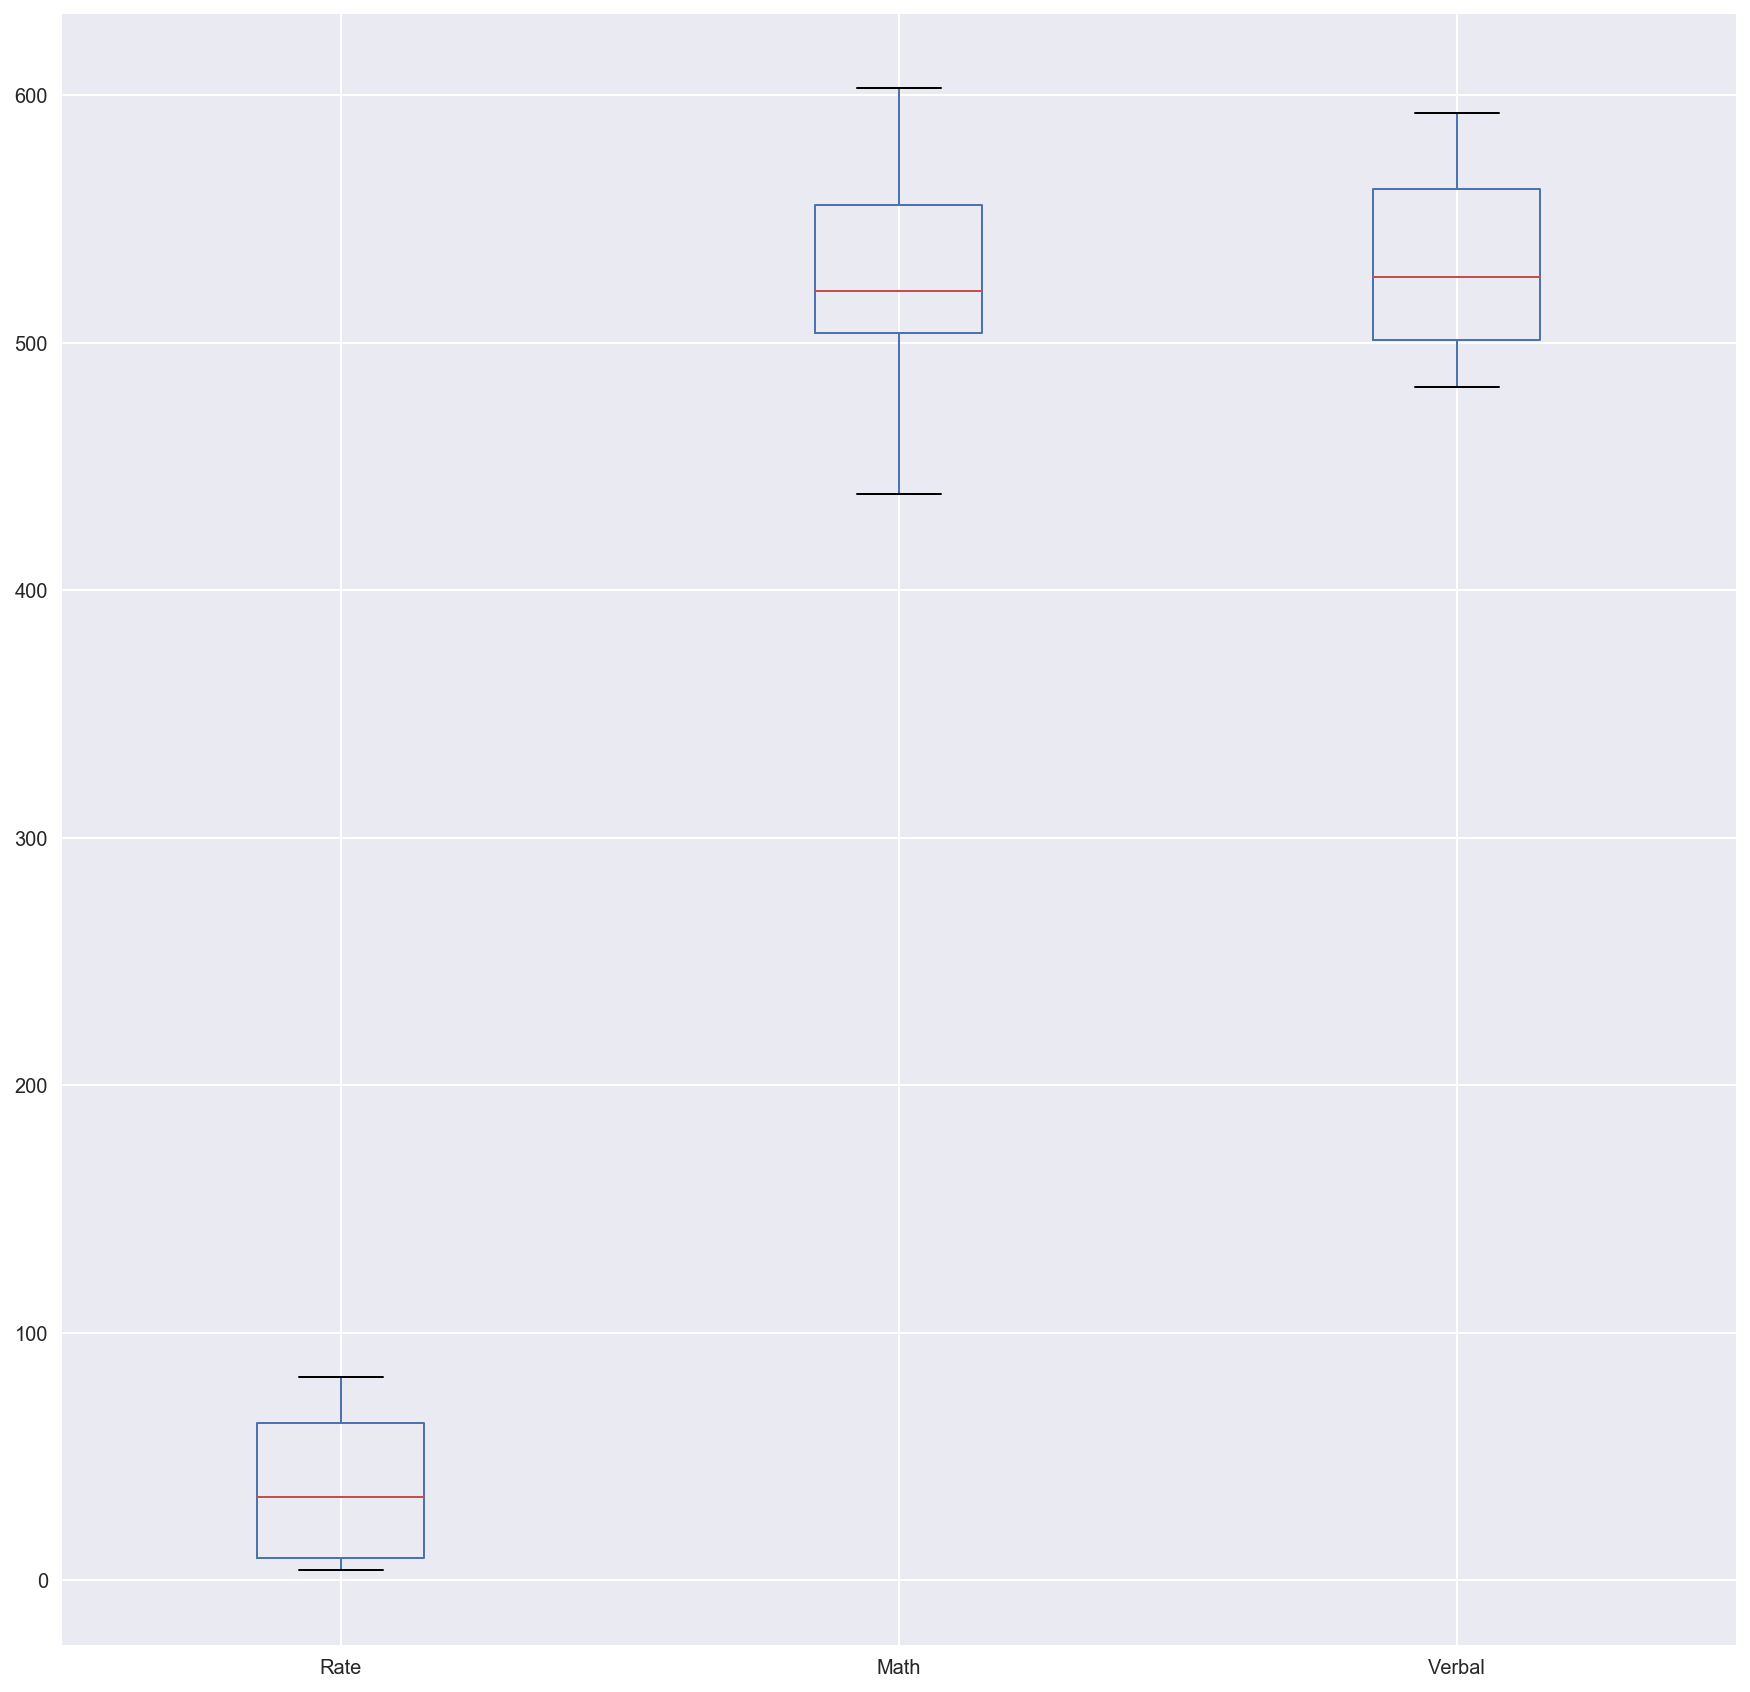

In [57]:
sat_renewed.boxplot()

In [58]:
sat_normalised = sat_renewed.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


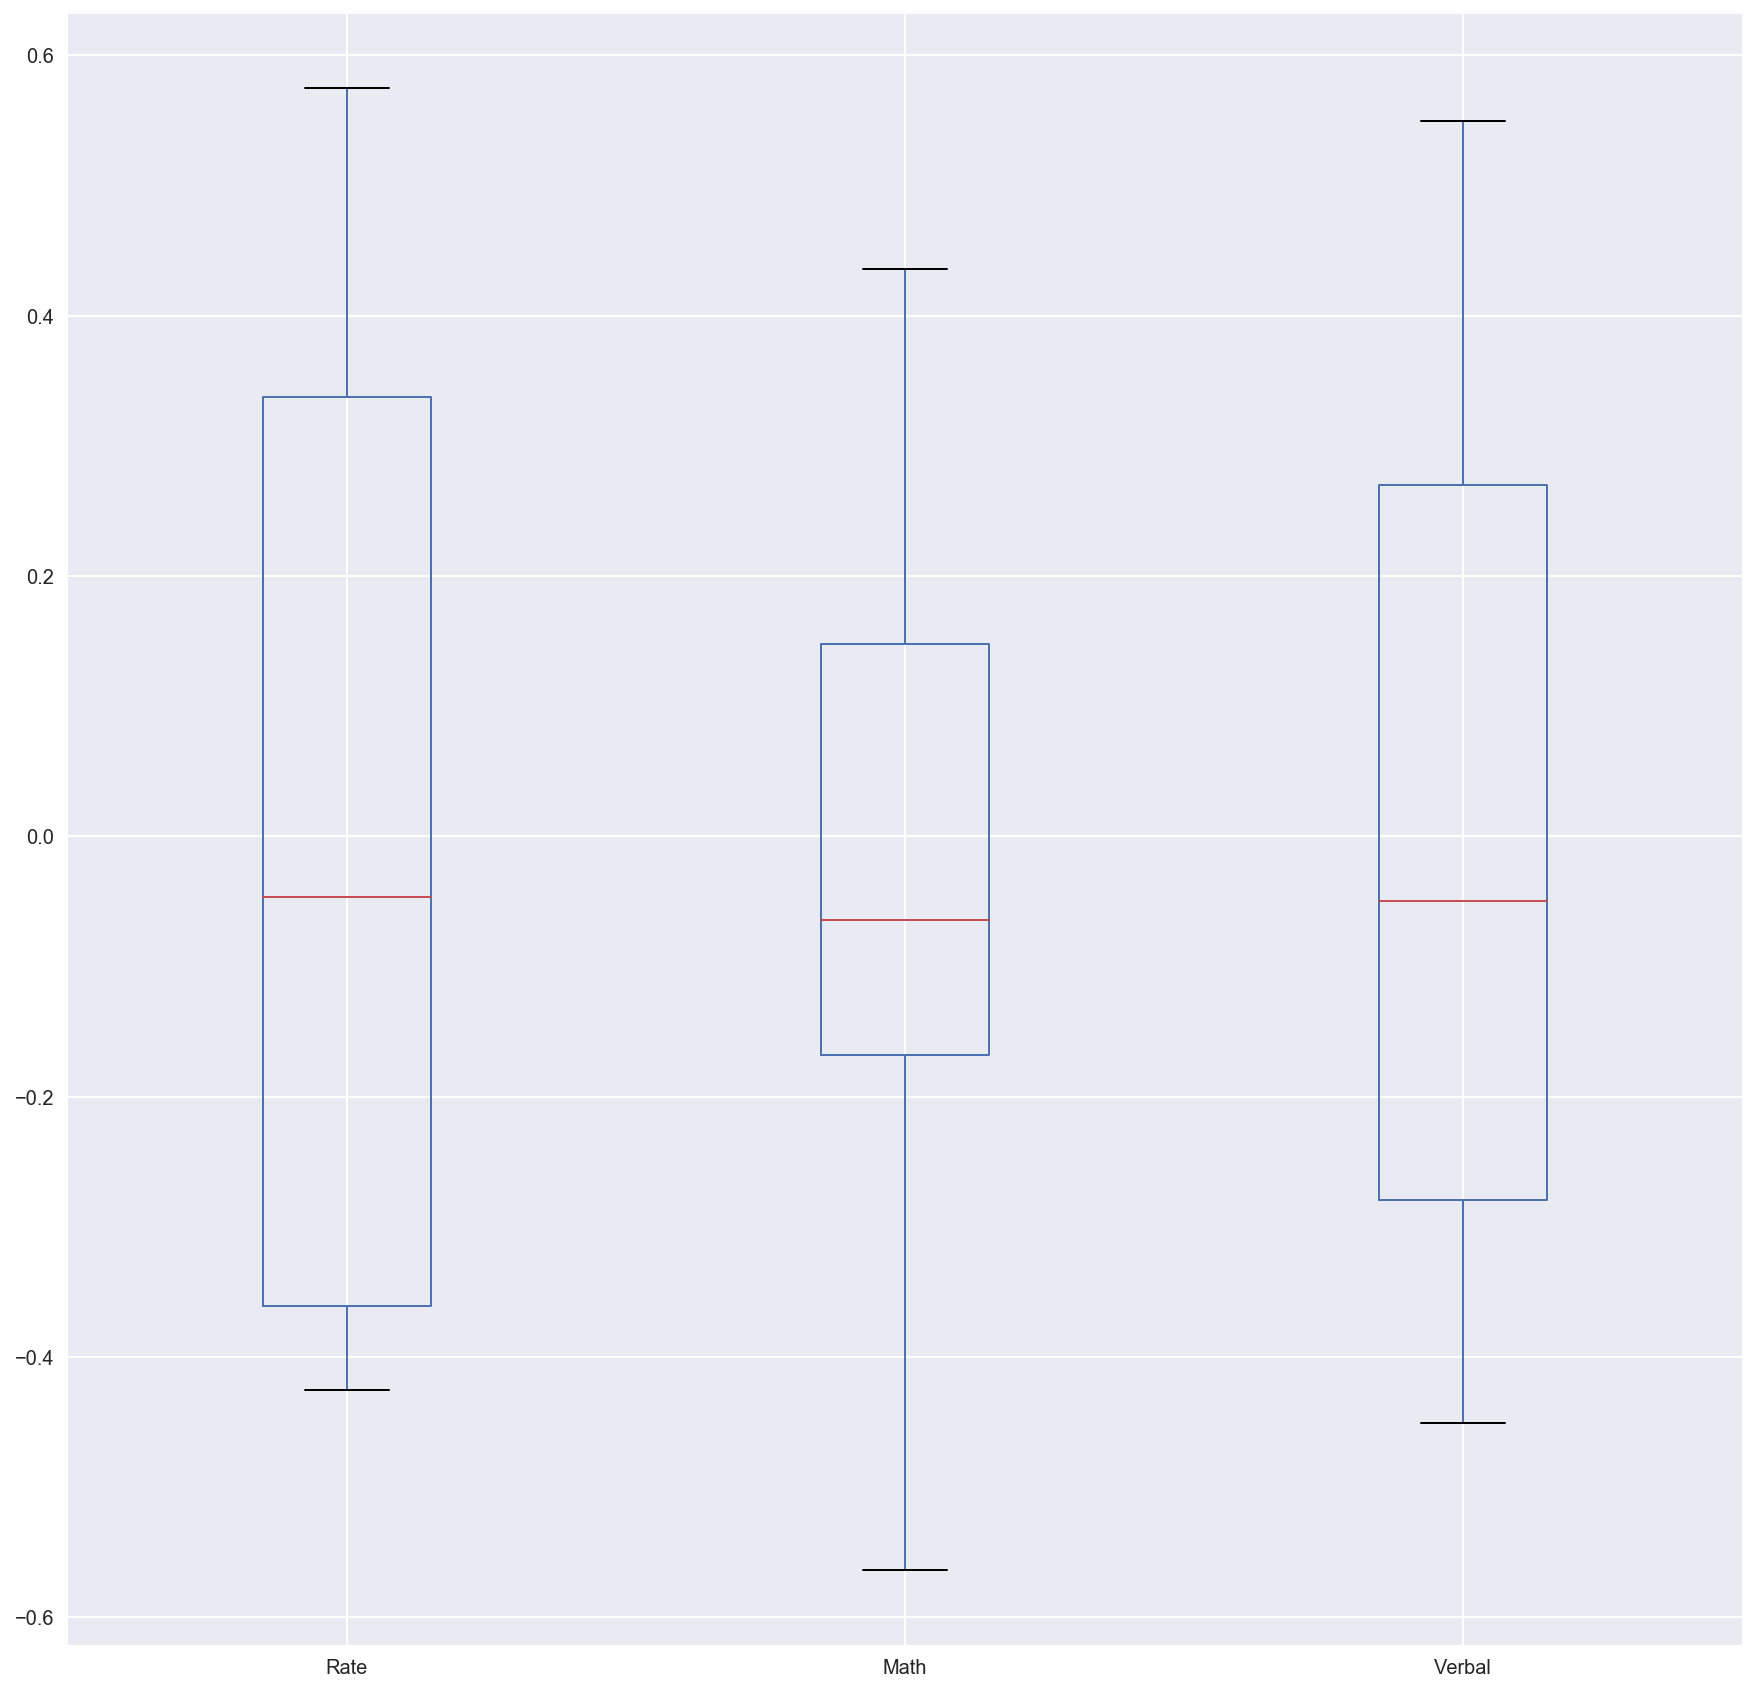

In [59]:
sat_normalised.boxplot() #Default 1.5 IQR

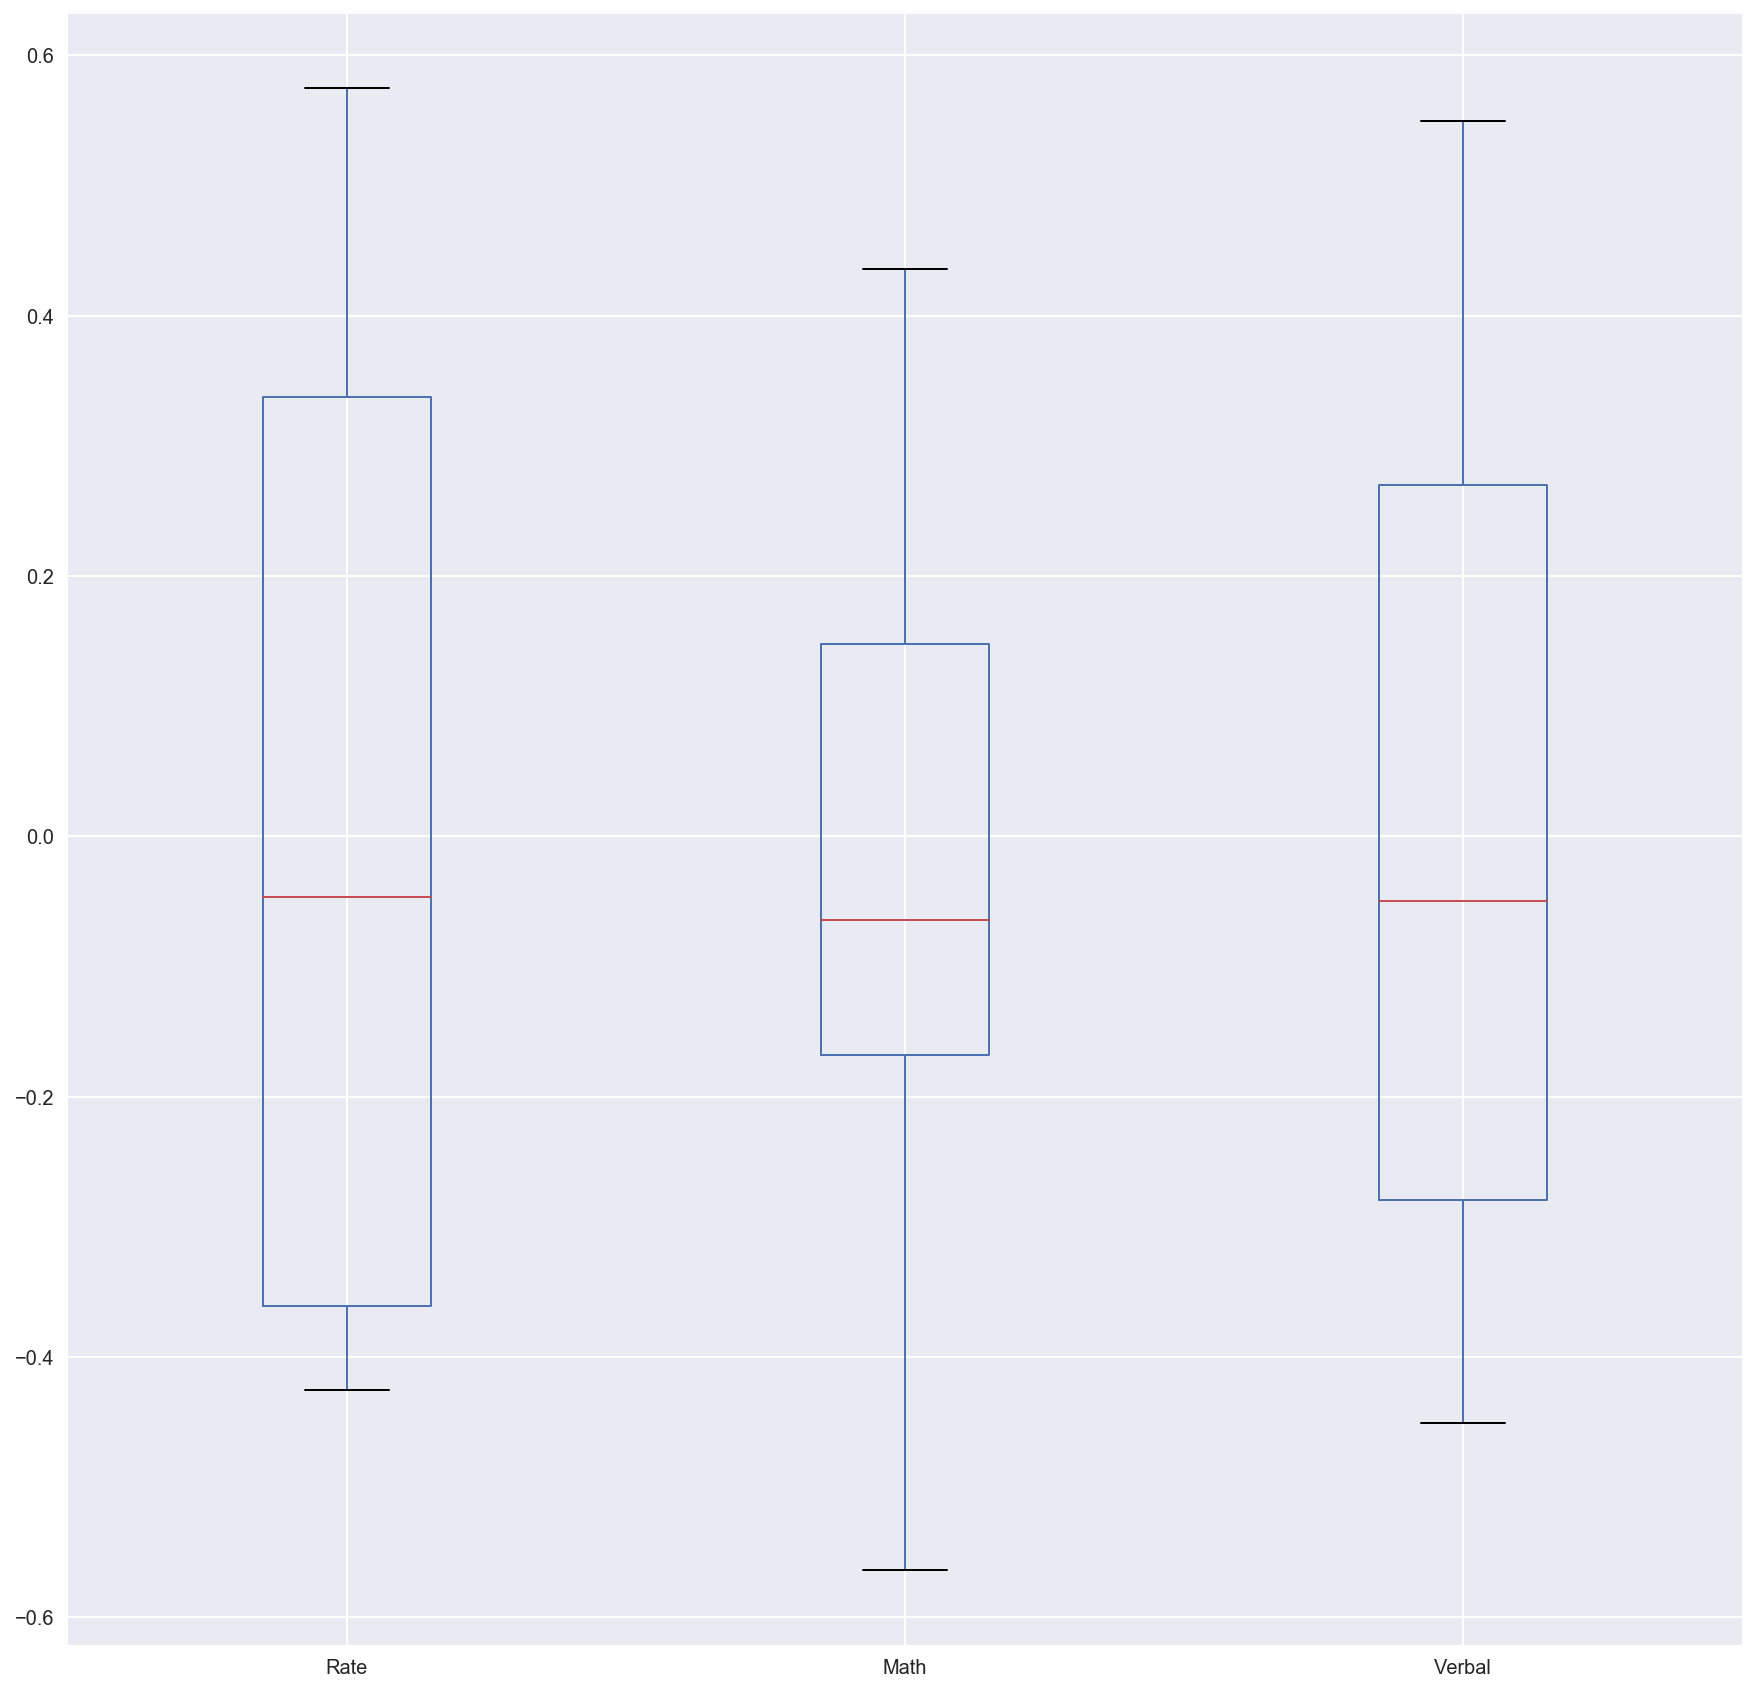

In [60]:
sat_normalised.boxplot() #Default 1.5 IQR

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [61]:
sat_df[['Verbal', 'Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


<div class="alert alert-block alert-success">

The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

</div class>
___

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [62]:
percentile_rate = sat_df['Rate']

percentile_score = []
for i in percentile_rate:
    percentile_score.append(stats.percentileofscore(percentile_rate, i))

sat_df['Percentile'] = percentile_score

sat_df.loc[[23]]

,State,Rate,Verbal,Math,Difference,Percentile
23,CA,51,498,517,-19,56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.